In [1]:
import warnings 
warnings.simplefilter('ignore')

import shap
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import scparadise
import muon as mu
import os
sc.settings.set_figure_params(dpi = 300, dpi_save = 600)

# Load dataset

In [2]:
# Load normalized integrated data
mdata = mu.read_h5mu('PBMC_3p_CITE/mdata_integrated_wnn.h5mu')

In [3]:
# Create test dataset
adata_rna = mdata.mod['rna'][mdata.mod['rna'].obs['orig.ident'].isin(['P5_7', 'P6_7'])].copy()
adata_adt = mdata.mod['adt'][mdata.mod['adt'].obs['orig.ident'].isin(['P5_7', 'P6_7'])].copy()

# scAdam prediction

In [4]:
# Predict cell types using pretrained scAdam model
adata_rna = scparadise.scadam.predict(adata_rna, 
                                      path_model = 'model_PBMC_scAdam_default')

Successfully loaded list of genes used for training model

Successfully loaded dictionary of dataset annotations

Successfully loaded model

Successfully added predicted celltype_l1 and cell type probabilities
Successfully added predicted celltype_l2 and cell type probabilities
Successfully added predicted celltype_l3 and cell type probabilities


In [5]:
# Classification report of celltype_l1
df = scparadise.scnoah.report_classif_full(adata_rna, 
                                           celltype = 'celltype_l1',
                                           pred_celltype= 'pred_celltype_l1',
                                           save_report = False,
                                           ndigits = 3,
                                           report_name = 'report_classif_full_celltype_l1.csv',
                                           save_path = '')
df

precision recall/sensitivity specificity f1-score  \
B                      0.999                1.0         1.0    0.999   
DC                     0.925              0.993       0.998    0.958   
Mono                   0.998              0.993       0.999    0.995   
NK                     0.996              0.991       0.999    0.994   
T                      0.995              0.998       0.997    0.996   
other                  0.987              0.959         1.0    0.973   
macro avg              0.983              0.989       0.999    0.986   
weighted avg           0.994              0.994       0.999    0.994   
Accuracy               0.994                                           
Balanced accuracy      0.989                                           

                  geometric mean index balanced accuracy number of cells  
B                            1.0                   0.999            2072  
DC                         0.995                    0.99             409  
Mono                       0.996                   0.991            4664  
NK                         0.995                    0.99            2323  
T                          0.998                   0.995            4905  
other                      0.979                   0.955             492  
macro avg                  0.994                   0.987                  
weighted avg               0.996                   0.992                  
Accuracy                                                                  
Balanced accuracy

In [6]:
# Classification report of celltype_l2
df = scparadise.scnoah.report_classif_full(adata_rna, 
                                           celltype = 'celltype_l2',
                                           pred_celltype= 'pred_celltype_l2',
                                           save_report = False,
                                           ndigits = 3,
                                           report_name = 'report_classif_full_celltype_l2.csv',
                                           save_path = '')
df

precision recall/sensitivity specificity f1-score  \
ASDC                   1.000                1.0         1.0      1.0   
CD14 Mono              0.997              0.973       0.999    0.985   
CD16 Mono              0.862              0.989       0.995    0.921   
CD4 T                  0.979              0.972       0.996    0.976   
CD8 T                  0.974              0.957       0.996    0.966   
HSPC                   1.000                1.0         1.0      1.0   
ILC                    0.821                1.0         1.0    0.902   
NK                     0.996              0.958       0.999    0.976   
NK_CD56bright          0.697                1.0       0.995    0.821   
Plasmablast            0.938                1.0         1.0    0.968   
Platelet               0.986              0.948         1.0    0.967   
cDC                    0.888               0.99       0.997    0.936   
other B                1.000              0.999         1.0    0.999   
other T                0.860              0.969       0.994    0.911   
pDC                    0.989                1.0         1.0    0.994   
macro avg              0.932              0.984       0.998    0.955   
weighted avg           0.976              0.973       0.998    0.973   
Accuracy               0.973                                           
Balanced accuracy      0.984                                           

                  geometric mean index balanced accuracy number of cells  
ASDC                         1.0                     1.0              10  
CD14 Mono                  0.986                   0.969            4196  
CD16 Mono                  0.992                   0.984             468  
CD4 T                      0.984                   0.966            2424  
CD8 T                      0.976                    0.95            1936  
HSPC                         1.0                     1.0               8  
ILC                          1.0                     1.0              23  
NK                         0.978                   0.953            2160  
NK_CD56bright              0.998                   0.996             163  
Plasmablast                  1.0                     1.0              15  
Platelet                   0.973                   0.943             461  
cDC                        0.994                   0.987             311  
other B                    0.999                   0.999            2057  
other T                    0.981                   0.961             545  
pDC                          1.0                     1.0              88  
macro avg                  0.991                    0.98                  
weighted avg               0.985                   0.968                  
Accuracy                                                                  
Balanced accuracy

In [7]:
# Classification report of celltype_l3
df = scparadise.scnoah.report_classif_full(adata_rna, 
                                           celltype = 'celltype_l3',
                                           pred_celltype= 'pred_celltype_l3',
                                           save_report = False,
                                           ndigits = 3,
                                           report_name = 'report_classif_full_celltype_l3.csv',
                                           save_path = '')
df

precision recall/sensitivity specificity f1-score  \
ASDC                   1.000                1.0         1.0      1.0   
B int κ                0.808              0.891       0.997    0.848   
B int λ                0.844              0.781       0.998    0.811   
B memory κ             0.880              0.841       0.998     0.86   
B memory λ             0.910              0.831       0.999    0.869   
B naive κ              0.877              0.922       0.993    0.899   
B naive λ              0.856              0.833       0.995    0.844   
CD14 Mono              0.997              0.972       0.999    0.984   
CD16 Mono              0.861              0.991       0.995    0.922   
CD4 CTL                0.205              0.727       0.998     0.32   
CD4 T Naive            0.898              0.951       0.992    0.924   
CD4 T Prolif           0.500              0.273         1.0    0.353   
CD4 TCM                0.922              0.723       0.995    0.811   
CD4 TEM                0.598              0.778       0.989    0.676   
CD8 T Naive            0.983               0.92       0.999     0.95   
CD8 T Prolif           0.519              0.933       0.999    0.667   
CD8 TCM                0.717              0.904       0.995      0.8   
CD8 TEM                0.948               0.92       0.997    0.934   
HSPC                   1.000                1.0         1.0      1.0   
ILC                    0.767                1.0         1.0    0.868   
MAIT                   0.847              0.975       0.998    0.906   
NK                     0.996              0.954       0.999    0.975   
NK Prolif              0.823               0.94       0.999    0.878   
NK_CD56bright          0.706                1.0       0.995    0.827   
Plasmablast            0.938                1.0         1.0    0.968   
Platelet               0.986              0.948         1.0    0.967   
Treg                   0.547               0.82       0.998    0.656   
cDC1                   0.889                1.0         1.0    0.941   
cDC2                   0.879              0.986       0.997     0.93   
dnT                    0.111                1.0       0.997      0.2   
gdT                    0.906              0.887       0.998    0.897   
pDC                    0.989                1.0         1.0    0.994   
macro avg              0.803              0.897       0.997    0.827   
weighted avg           0.932              0.922       0.997    0.925   
Accuracy               0.922                                           
Balanced accuracy      0.897                                           

                  geometric mean index balanced accuracy number of cells  
ASDC                         1.0                     1.0              10  
B int κ                    0.943                    0.88             175  
B int λ                    0.883                   0.762             187  
B memory κ                 0.916                   0.826             252  
B memory λ                 0.911                   0.816             195  
B naive κ                  0.957                    0.91             721  
B naive λ                   0.91                   0.815             527  
CD14 Mono                  0.985                   0.968            4196  
CD16 Mono                  0.993                   0.986             468  
CD4 CTL                    0.852                   0.706              11  
CD4 T Naive                0.971                   0.939            1019  
CD4 T Prolif               0.522                   0.253              11  
CD4 TCM                    0.848                     0.7            1036  
CD4 TEM                    0.877                   0.753             297  
CD8 T Naive                0.959                   0.912             800  
CD8 T Prolif               0.966                   0.926              15  
CD8 TCM                    0.949                   0.892             188  
CD8 

In [8]:
# Add prediction status of cells for visualization on UMAP
scparadise.scnoah.pred_status(adata_rna,
                              celltype='celltype_l1',
                              pred_celltype='pred_celltype_l1',
                              key_added='pred_status_l1')
scparadise.scnoah.pred_status(adata_rna,
                              celltype='celltype_l2',
                              pred_celltype='pred_celltype_l2',
                              key_added='pred_status_l2')
scparadise.scnoah.pred_status(adata_rna,
                              celltype='celltype_l3',
                              pred_celltype='pred_celltype_l3',
                              key_added='pred_status_l3')

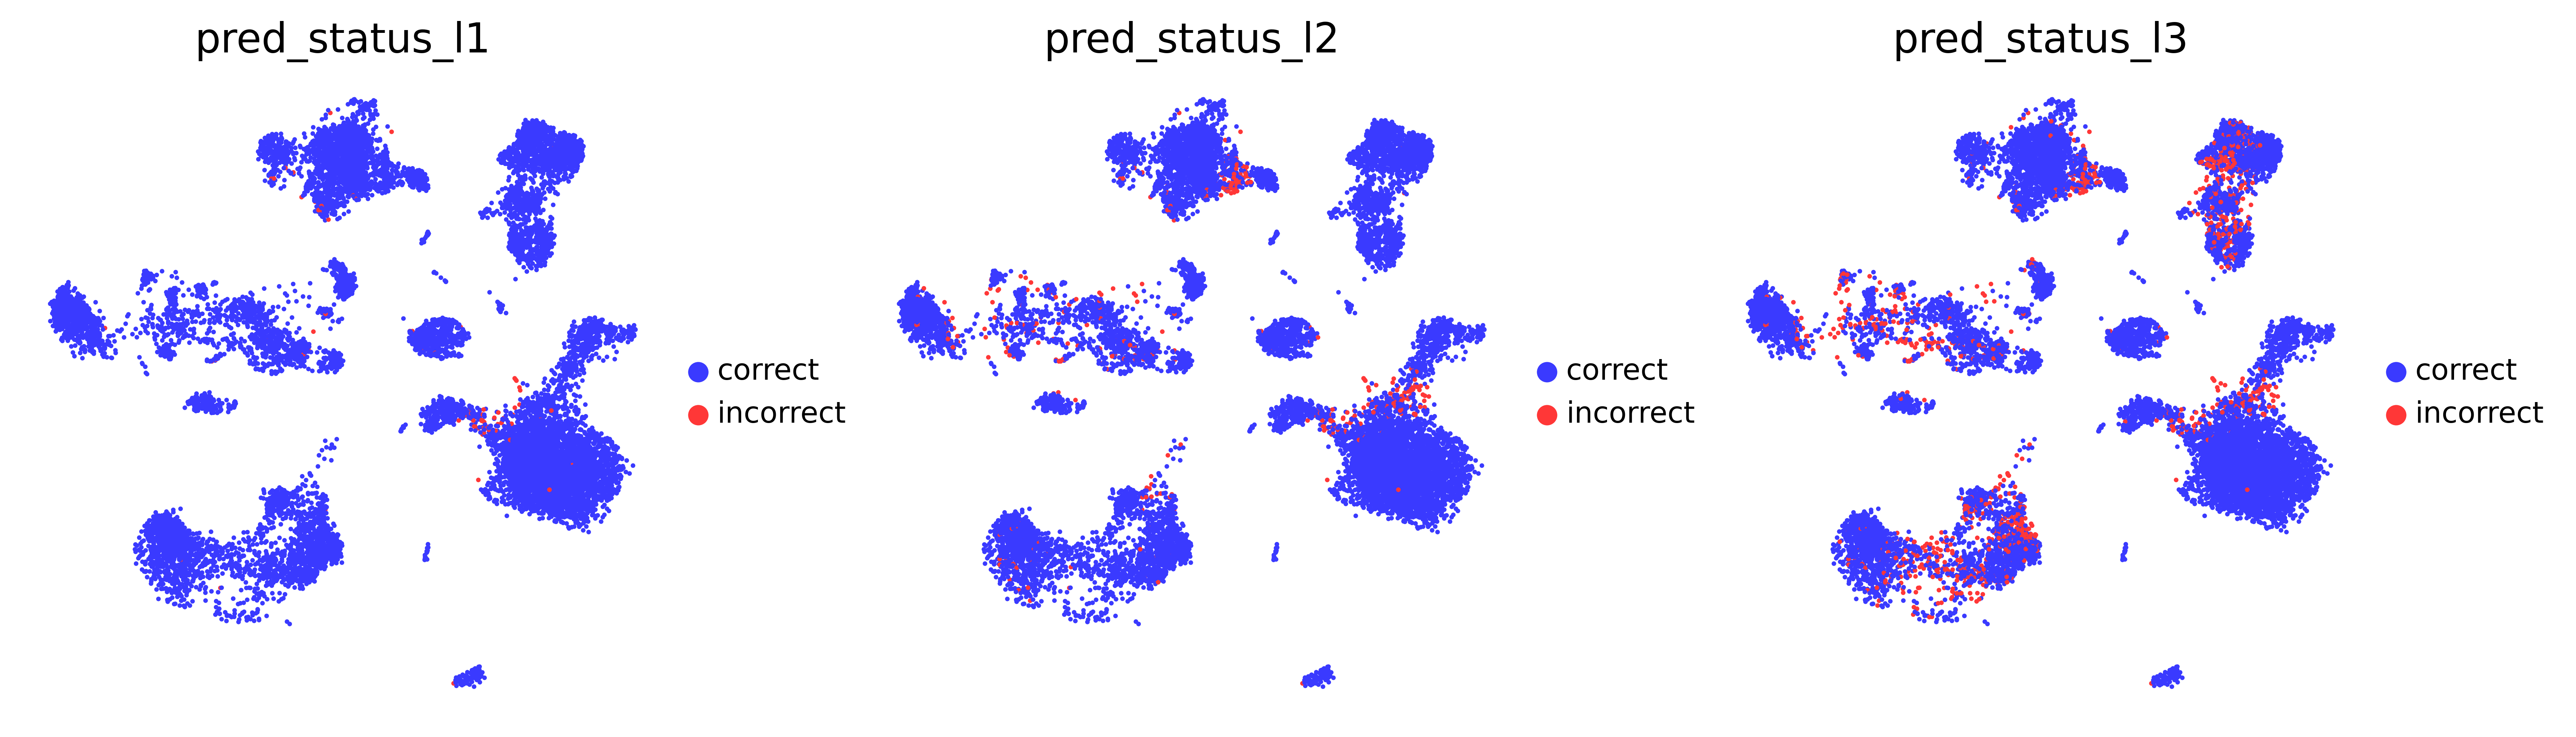

In [9]:
# Visualize prediction status of cells
sc.pl.embedding(adata_rna, 
                color=['pred_status_l1',
                       'pred_status_l2',
                       'pred_status_l3',
                      ], 
                basis = 'X_umap_wnn', 
                frameon = False,
                legend_fontsize = 10, 
                legend_fontoutline = 2, 
                wspace = 0.2,
                size = 10,
                ncols = 3,
                save = 'pred_status.png'
               )

In [29]:
df = pd.DataFrame()
df['pred_status_l1'] = adata_rna.obs['pred_status_l1'].value_counts()
df['pred_status_l2'] = adata_rna.obs['pred_status_l2'].value_counts()
df['pred_status_l3'] = adata_rna.obs['pred_status_l3'].value_counts()
df.loc['accuracy'] = [round(df['pred_status_l1']['correct']/sum(df['pred_status_l1']), 3),
                      round(df['pred_status_l2']['correct']/sum(df['pred_status_l2']), 3),
                      round(df['pred_status_l3']['correct']/sum(df['pred_status_l3']), 3)]
df

pred_status_l1  pred_status_l2  pred_status_l3
pred_status_l1                                                
correct              14777.000       14459.000       13711.000
incorrect               88.000         406.000        1154.000
accuracy                 0.994           0.973           0.922

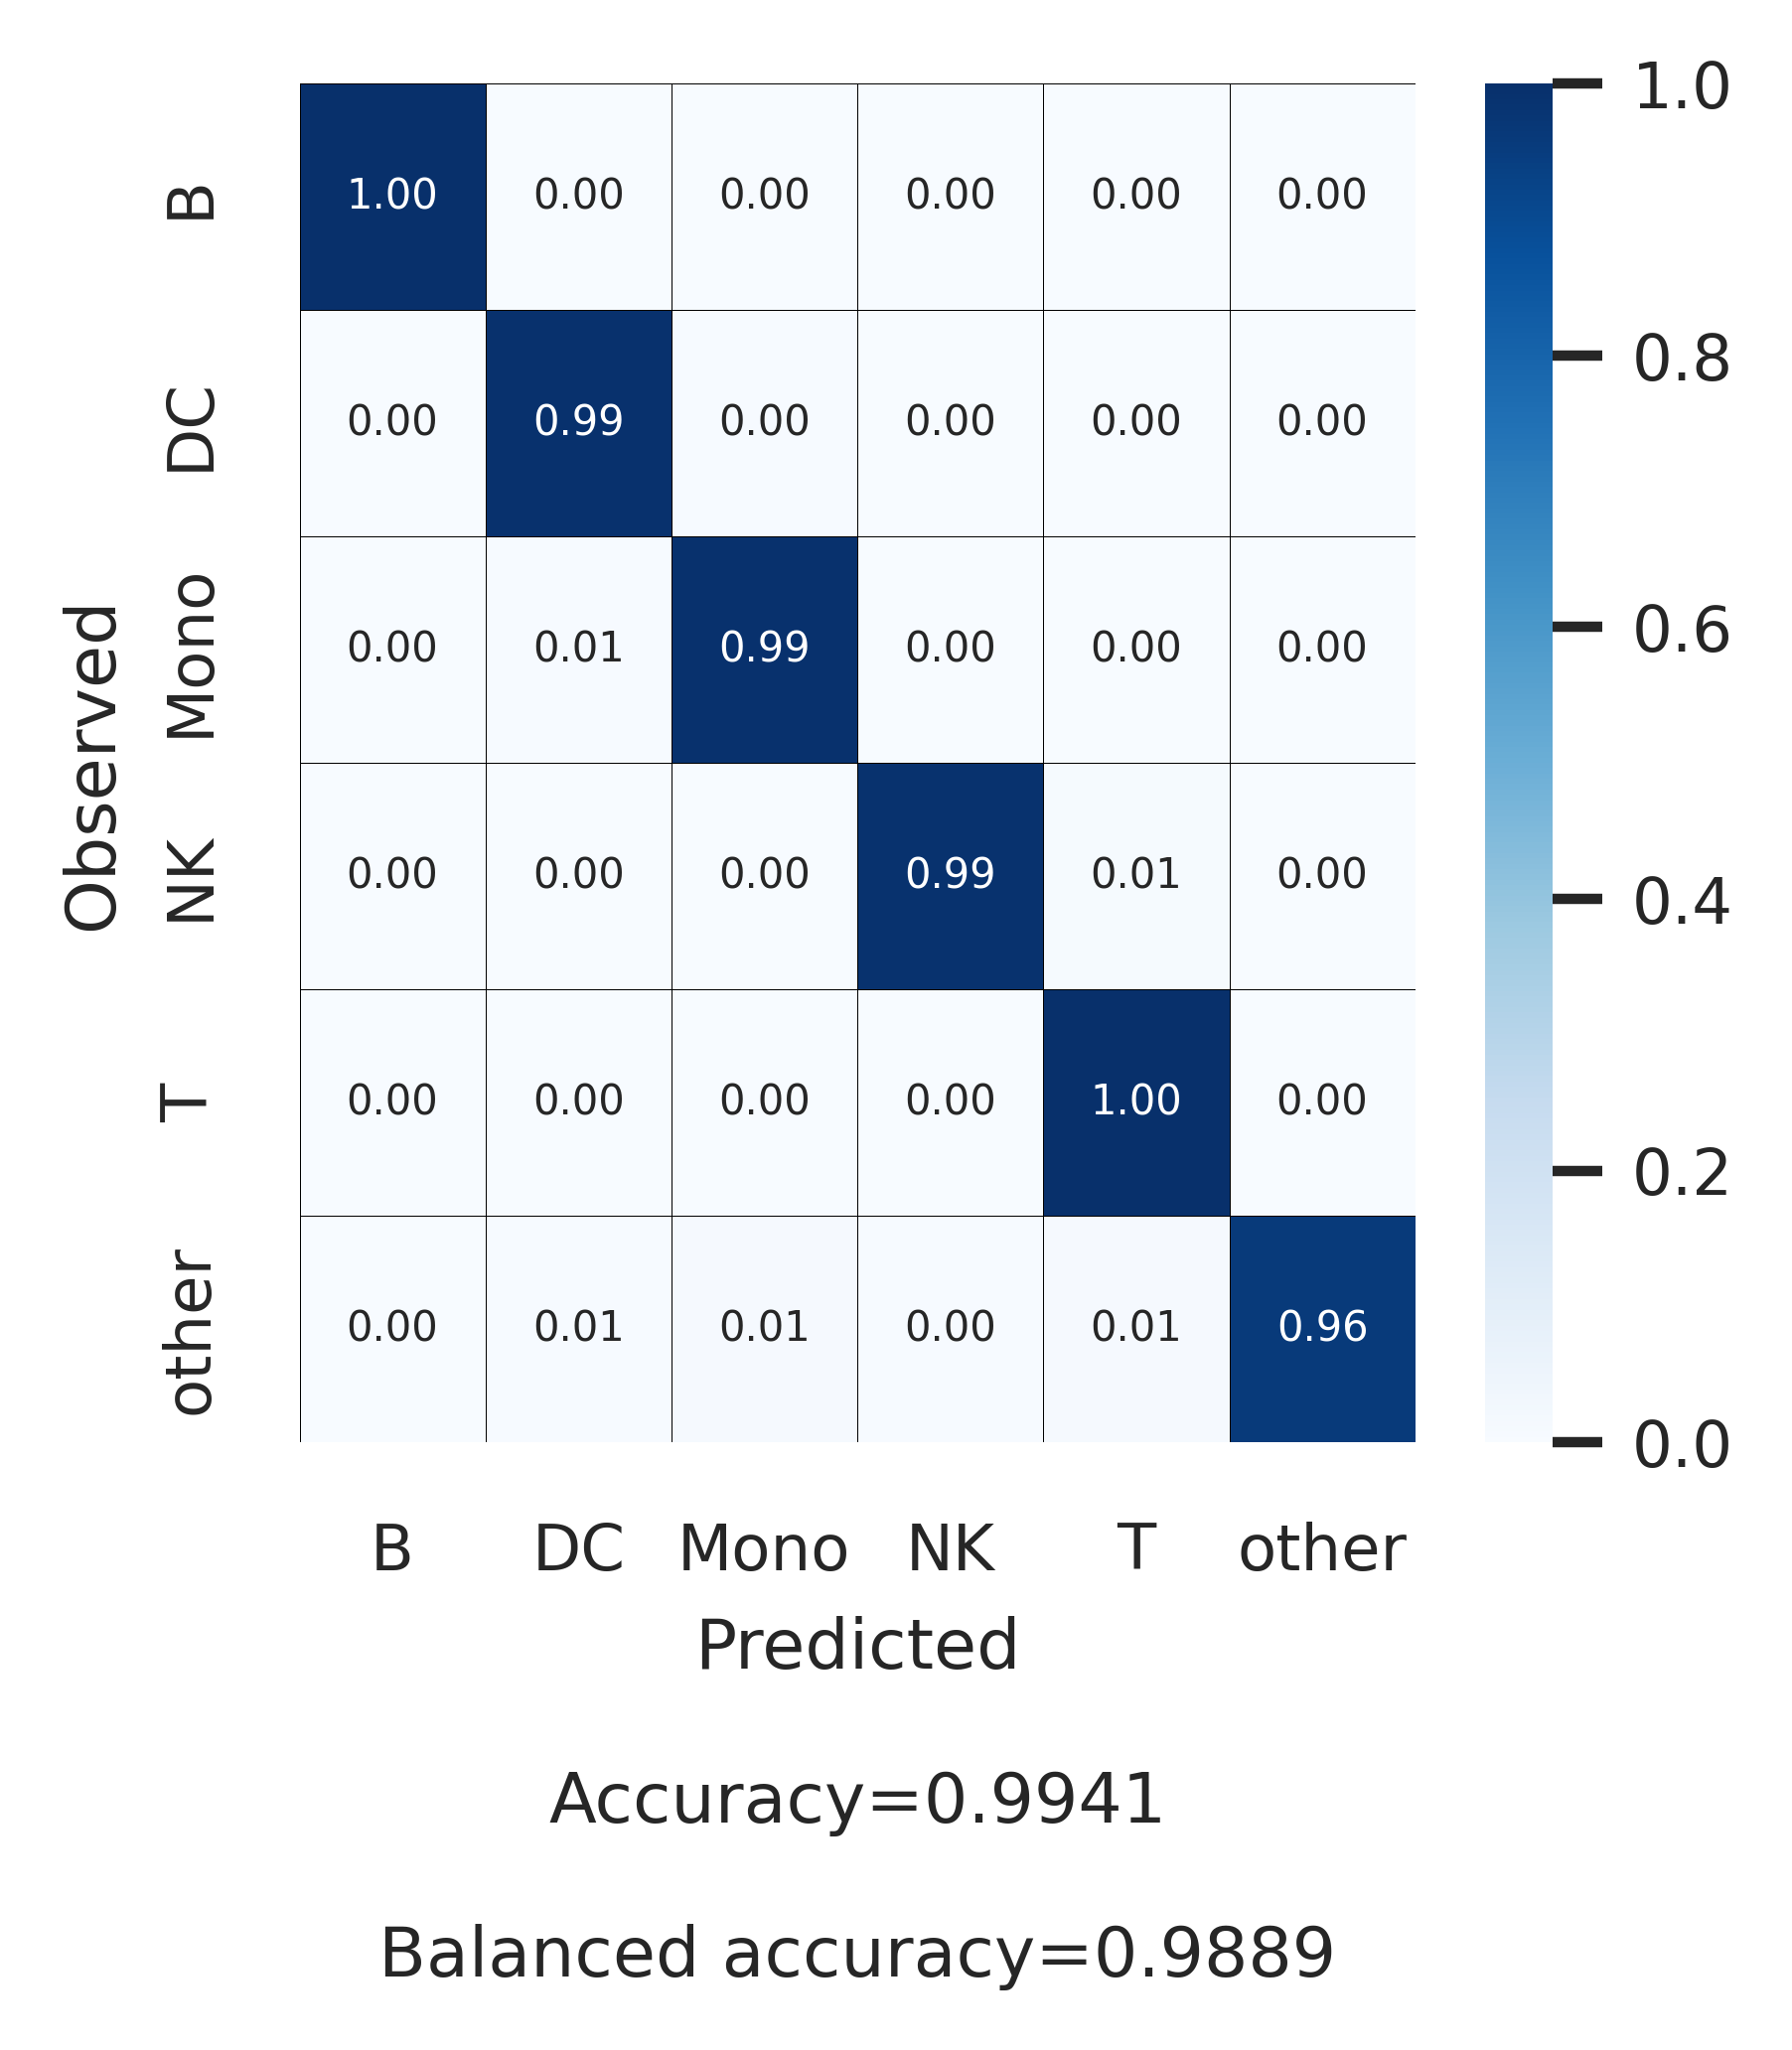

In [30]:
# Confusion matrix celltype_l1
sns.set(font_scale=0.7)
plt.figure(figsize=(3, 3))
scparadise.scnoah.conf_matrix(adata_rna,
                              celltype='celltype_l1',
                              pred_celltype='pred_celltype_l1',
                              annot_kws={"size":5},
                              linewidths=0.1, linecolor='black',
                              fmt =  ".2f",
                              ndigits_metrics = 4,
                              vmin=0, vmax=1)
plt.savefig('celltype_l1_conf_matrix.png', bbox_inches="tight")

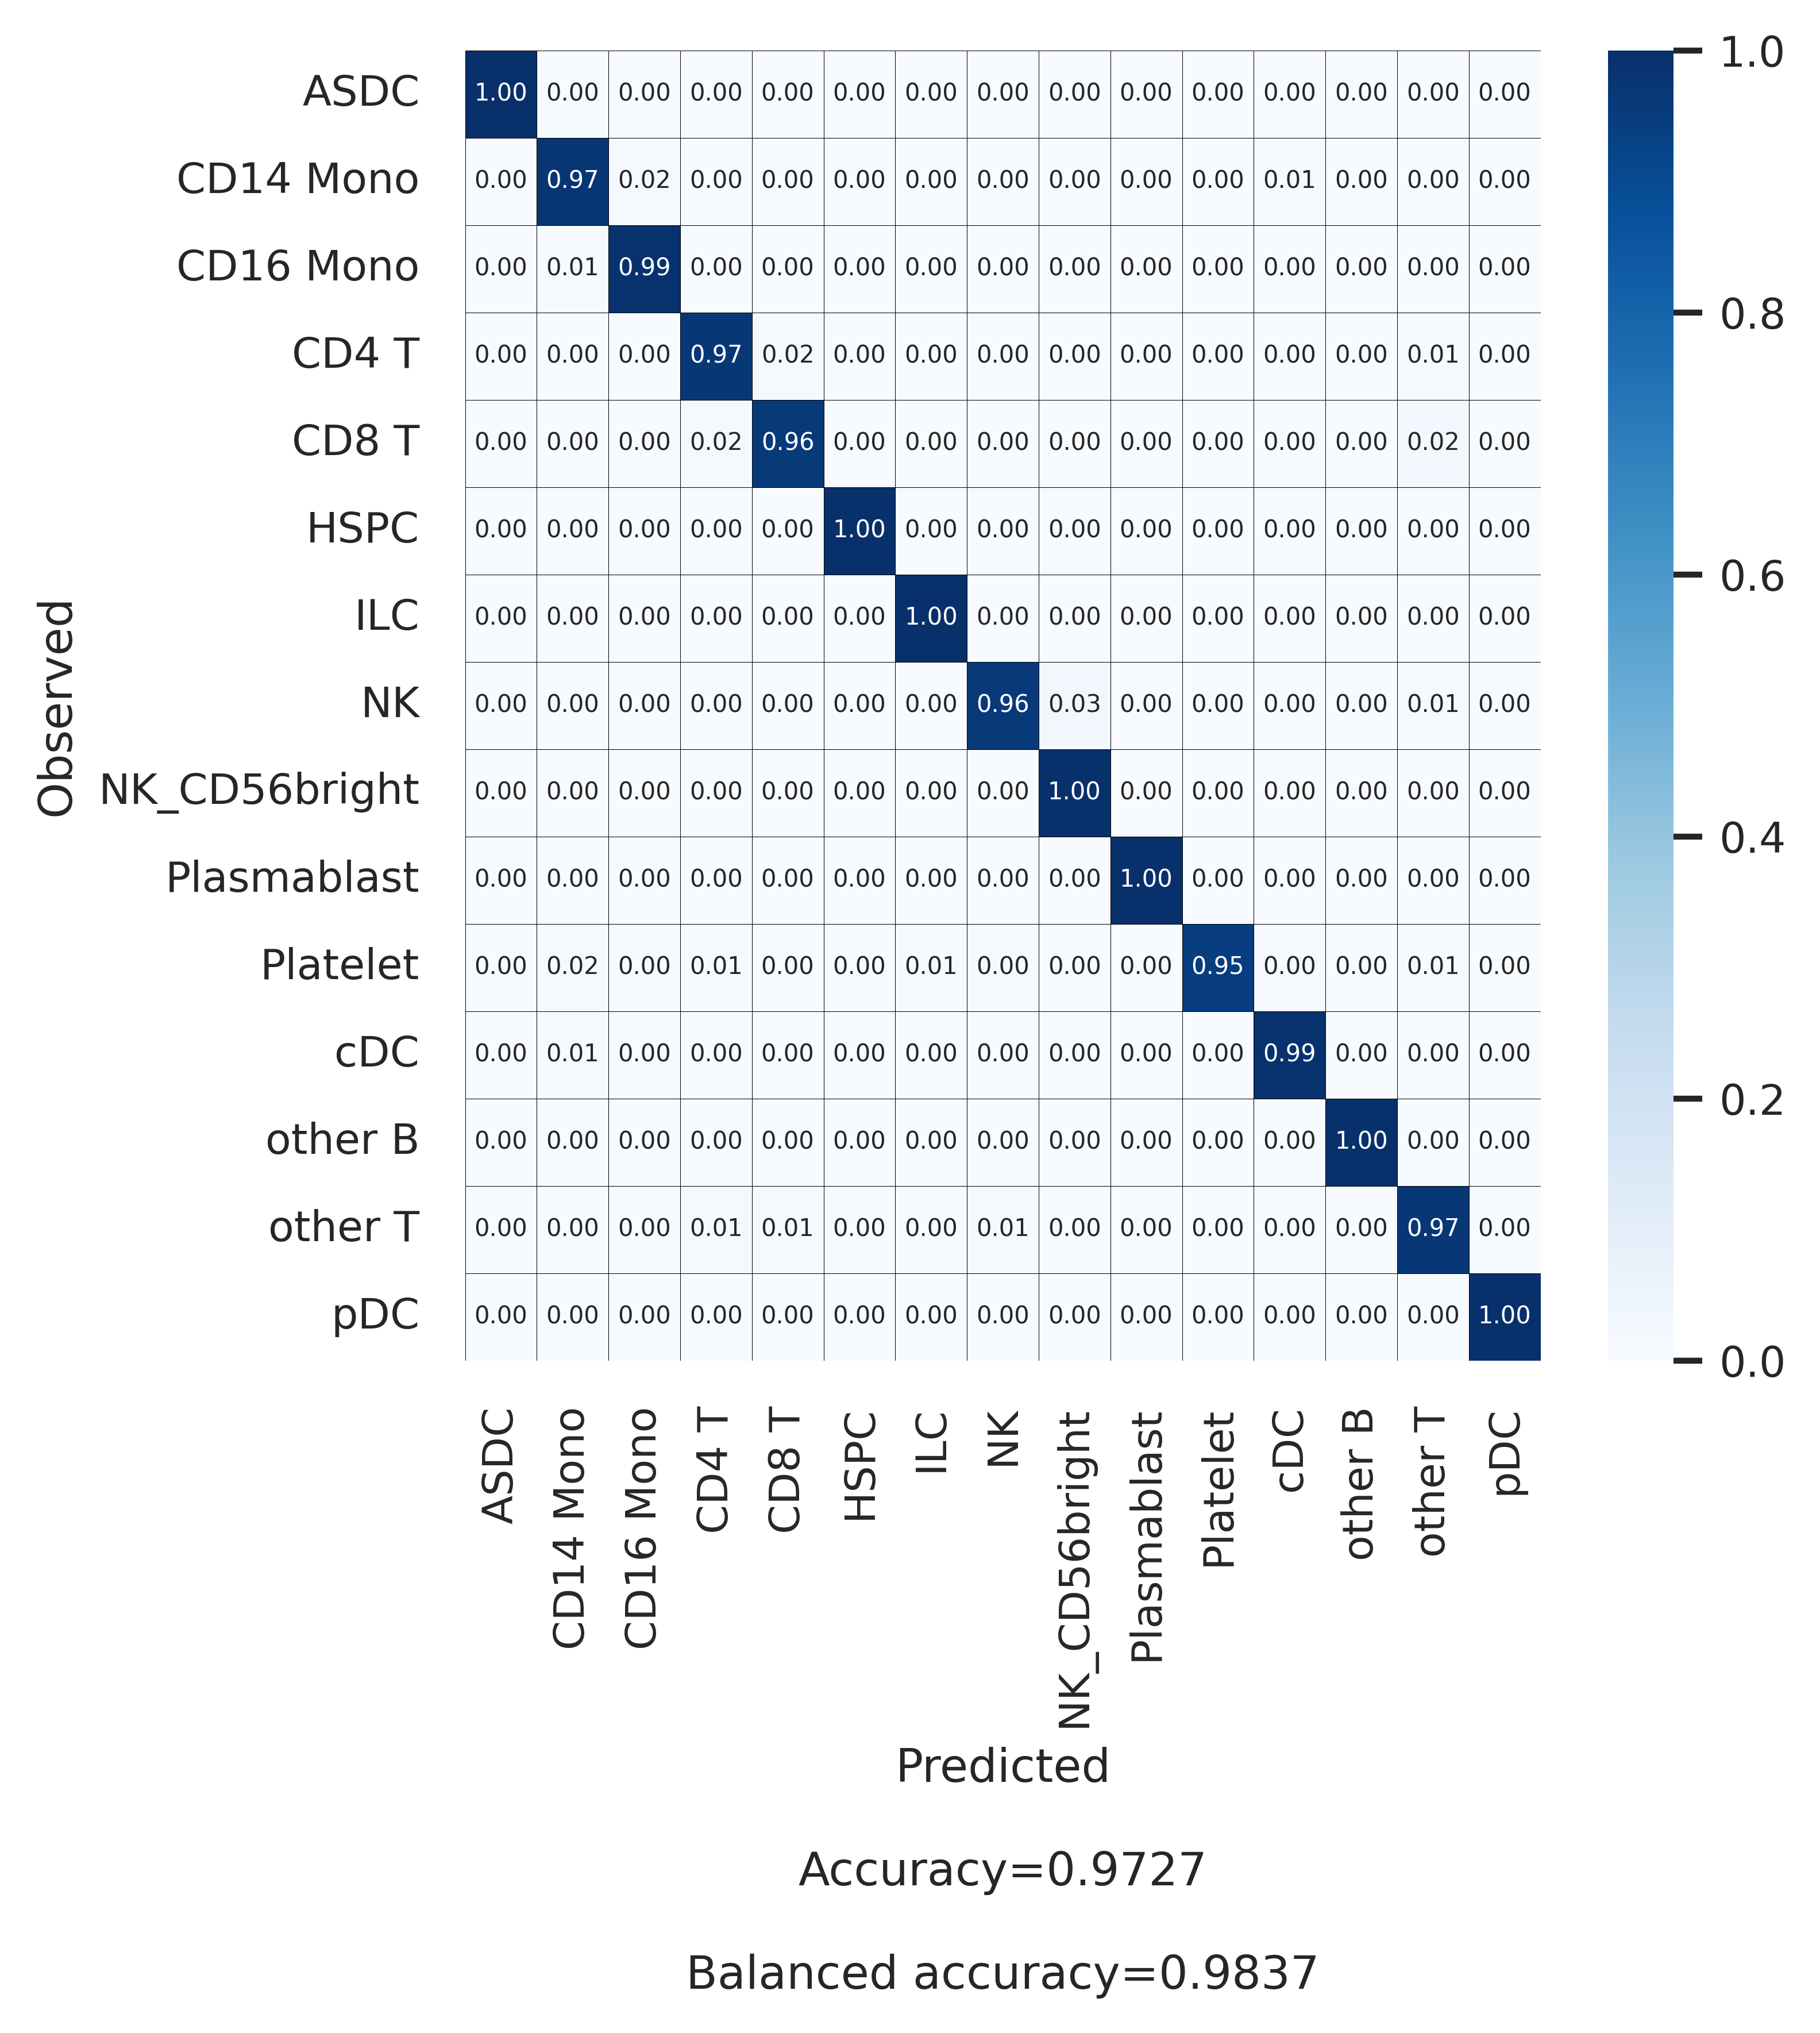

In [31]:
# Confusion matrix celltype_l2
sns.set(font_scale=0.8)
plt.figure(figsize=(5, 5))
scparadise.scnoah.conf_matrix(adata_rna,
                              celltype='celltype_l2',
                              pred_celltype='pred_celltype_l2',
                              annot_kws={"size":5},
                              linewidths=0.1, linecolor='black',
                              fmt =  ".2f",
                              ndigits_metrics = 4,
                              vmin=0, vmax=1)
plt.savefig('celltype_l2_conf_matrix.png', bbox_inches="tight")

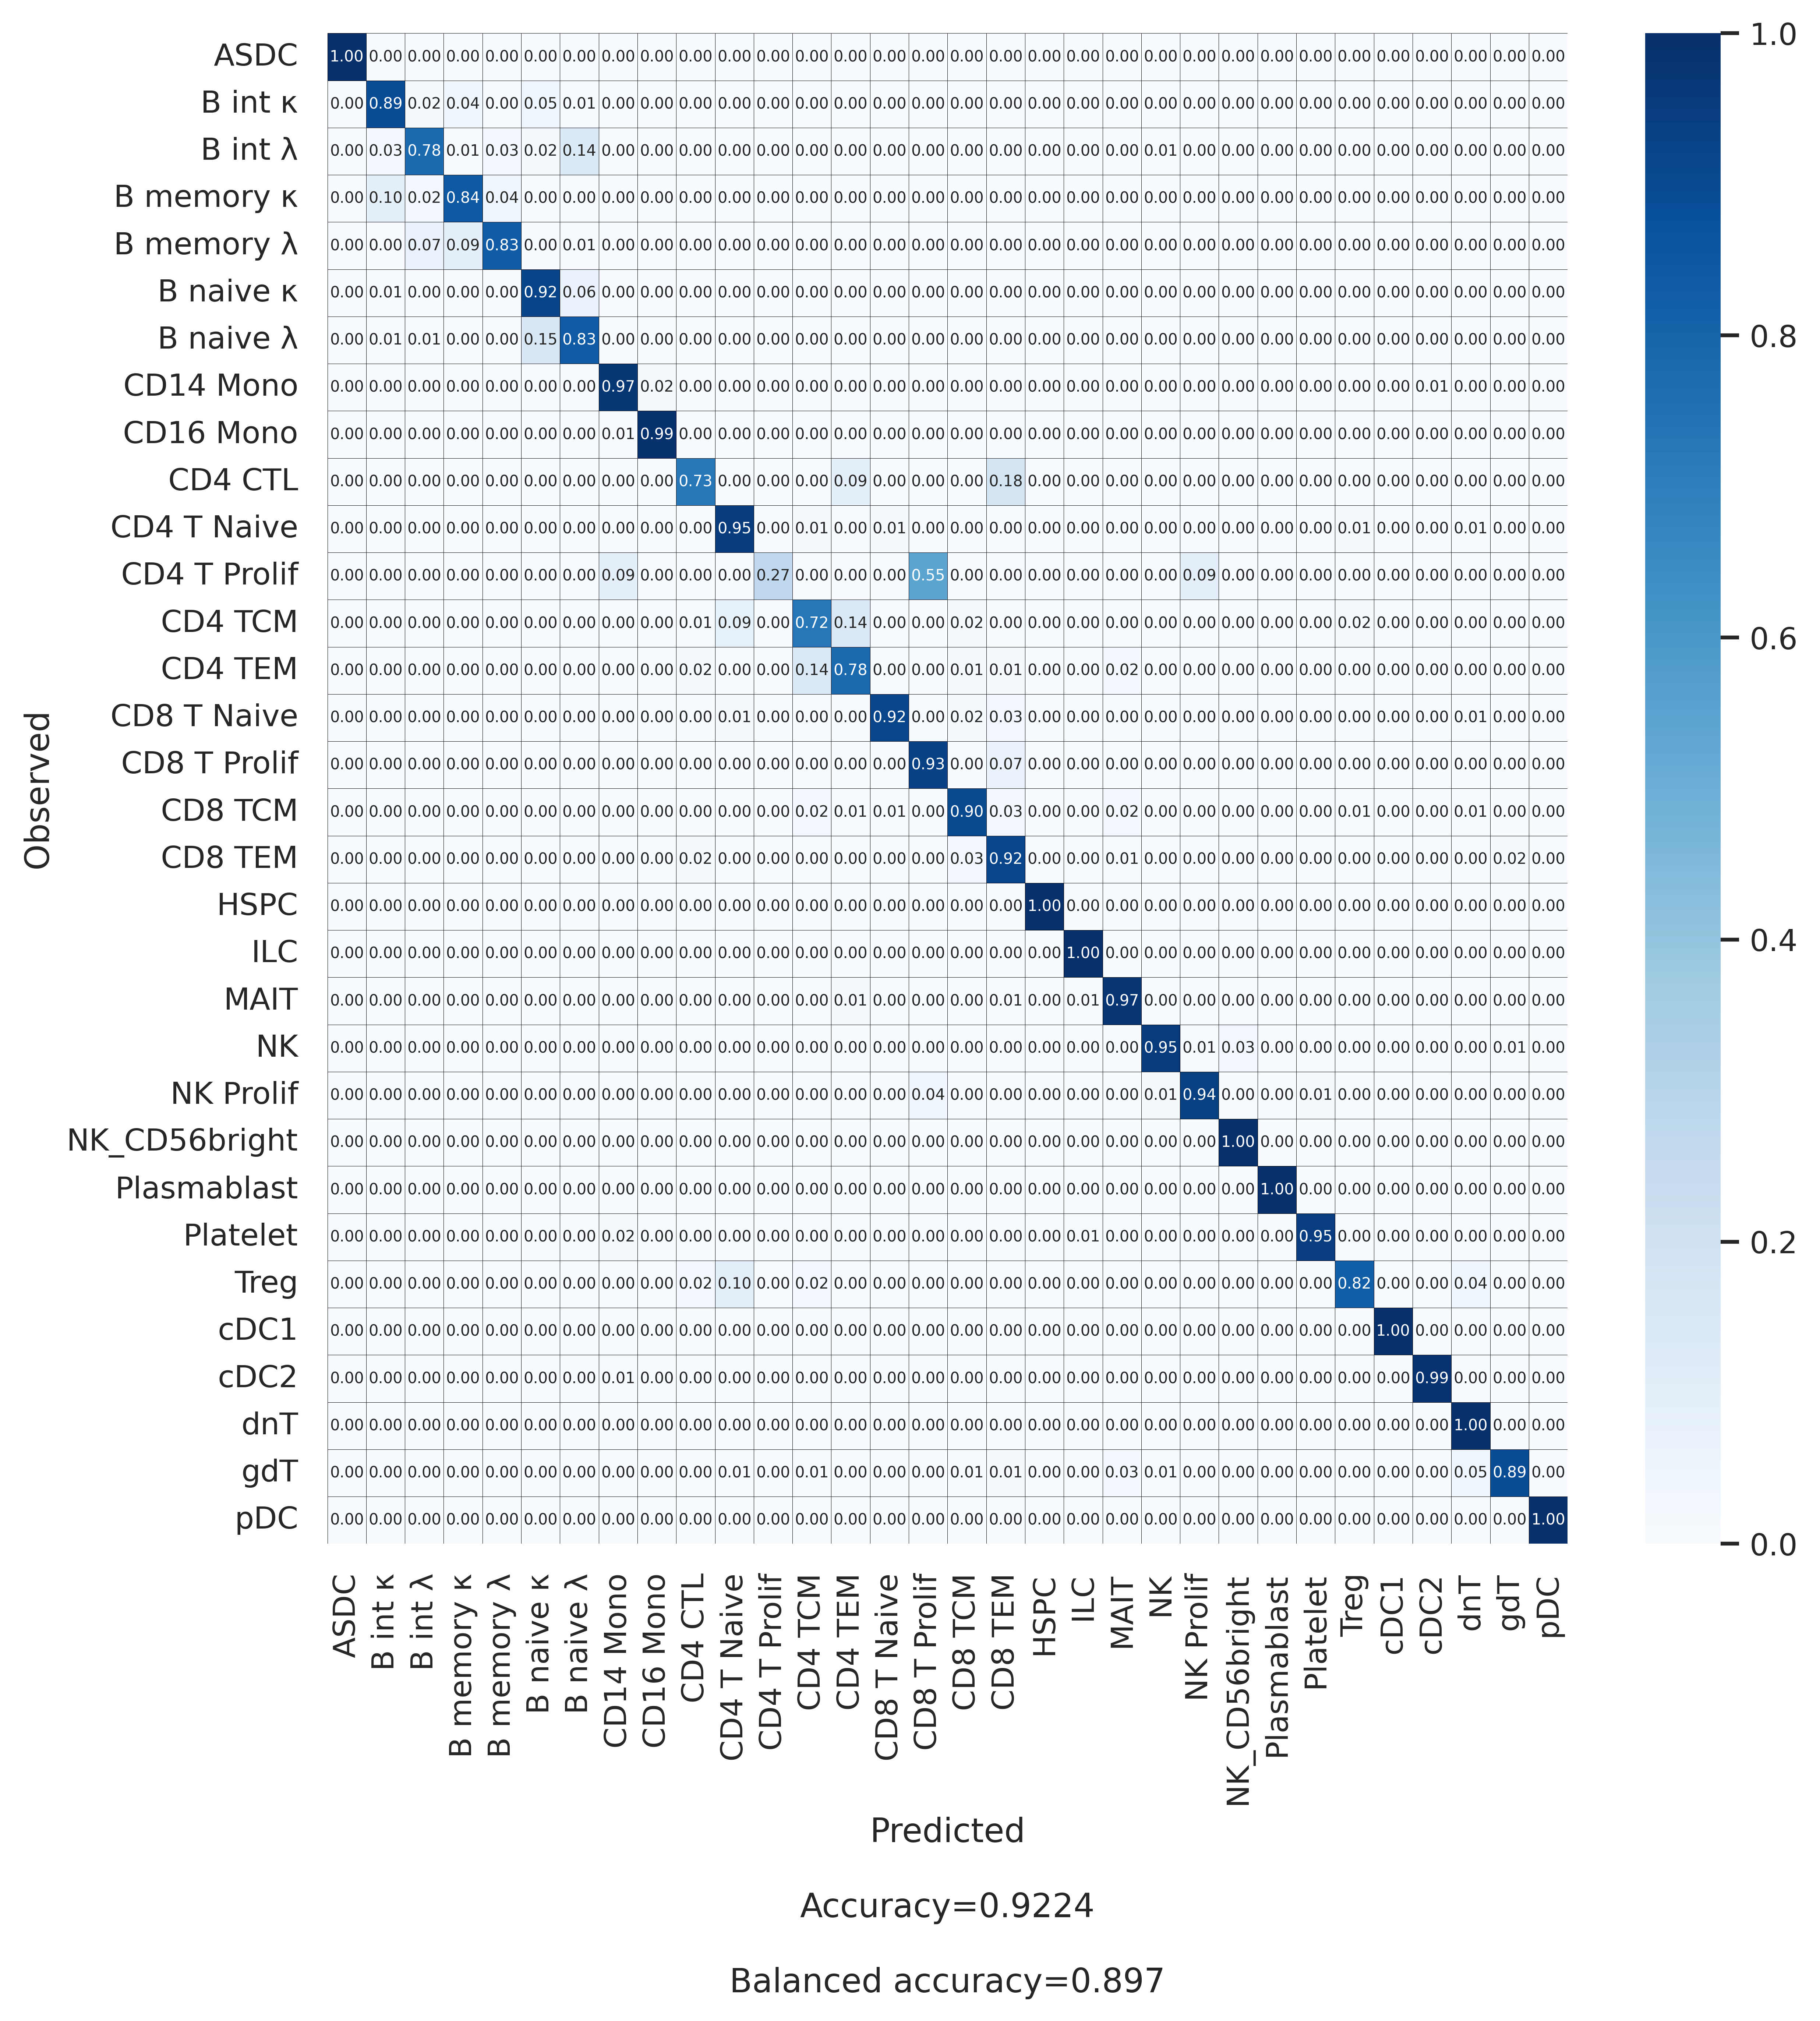

In [32]:
# Confusion matrix celltype_l3
sns.set(font_scale=0.9)
plt.figure(figsize=(9, 9))
scparadise.scnoah.conf_matrix(adata_rna,
                              celltype='celltype_l3',
                              pred_celltype='pred_celltype_l3',
                              annot_kws={"size":5},
                              linewidths=0.1, linecolor='black',
                              fmt =  ".2f",
                              ndigits_metrics = 4,
                              vmin=0, vmax=1)
plt.savefig('celltype_l3_conf_matrix.png', bbox_inches="tight")

## Gene importance analyis using scNoah

In [5]:
# Compute explanations for CD16+ non-classical monocytes (CD16 Mono)
explanations_CD16_Mono  = scparadise.scnoah.explain(adata_rna,
                                                    celltype = 'CD16 Mono',
                                                    path_model = 'model_PBMC_scAdam_default')

Successfully loaded list of genes used for training model
Successfully loaded dictionary of dataset annotations
Successfully loaded model
Cell type "CD16 Mono" was successfully selected from pred_celltype_l2


PermutationExplainer explainer: 101it [03:23,  2.12s/it]                                                                

The explanations for "CD16 Mono" have been completed


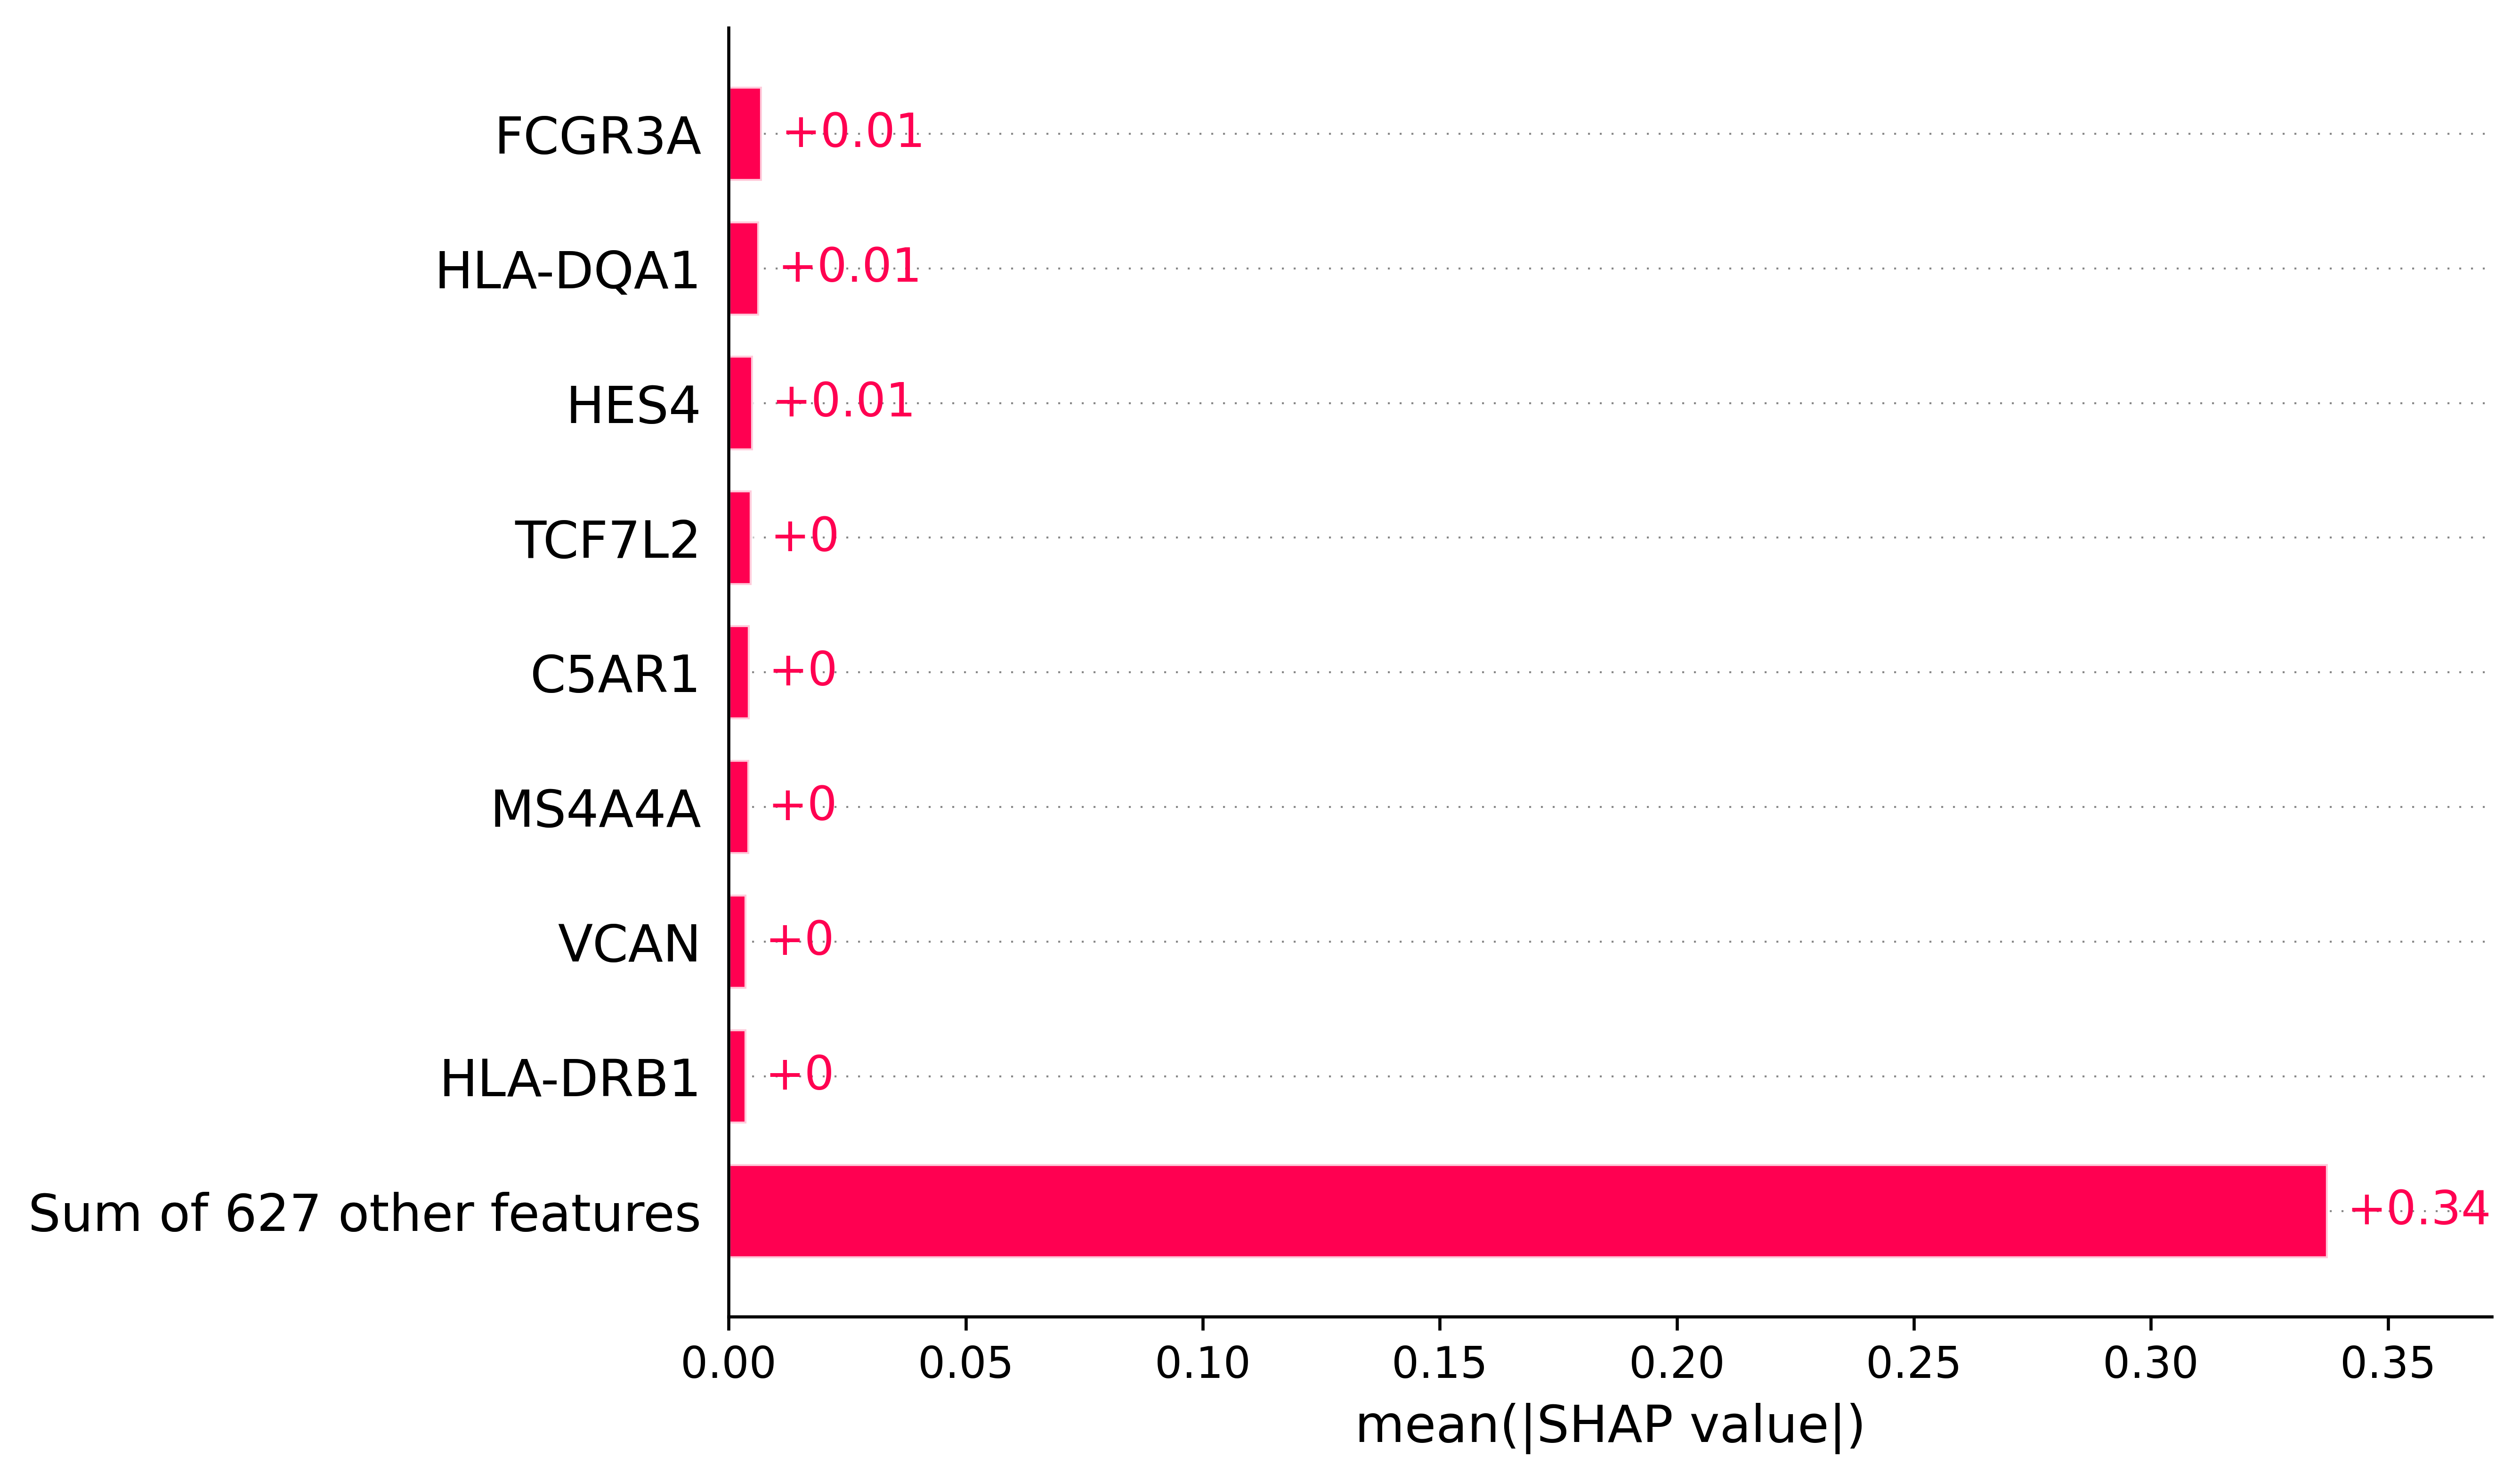

In [6]:
# Visualization of explanations
# For the annotation of CD16+ Monocytes, the following genes are of the greatest importance:
plt.grid(visible=False, axis='both')
shap.plots.bar(explanations_CD16_Mono, max_display=9)

In [7]:
# Calculate gene impoortances
gene_importances_CD16_Mono = scparadise.scnoah.feature_importance(explanations_CD16_Mono,
                                                                  path_model = 'model_PBMC_scAdam_default')
# Show 10 most important genes for CD16+ Monocytes annotation
gene_importances_CD16_Mono.head(10)

gene_name  gene_importance
79     FCGR3A          0.00705
562  HLA-DQA1          0.00640
178      HES4          0.00515
445    TCF7L2          0.00485
590     C5AR1          0.00445
61     MS4A4A          0.00435
451      VCAN          0.00370
133  HLA-DRB1          0.00370
522      IER3          0.00360
199     TPPP3          0.00350

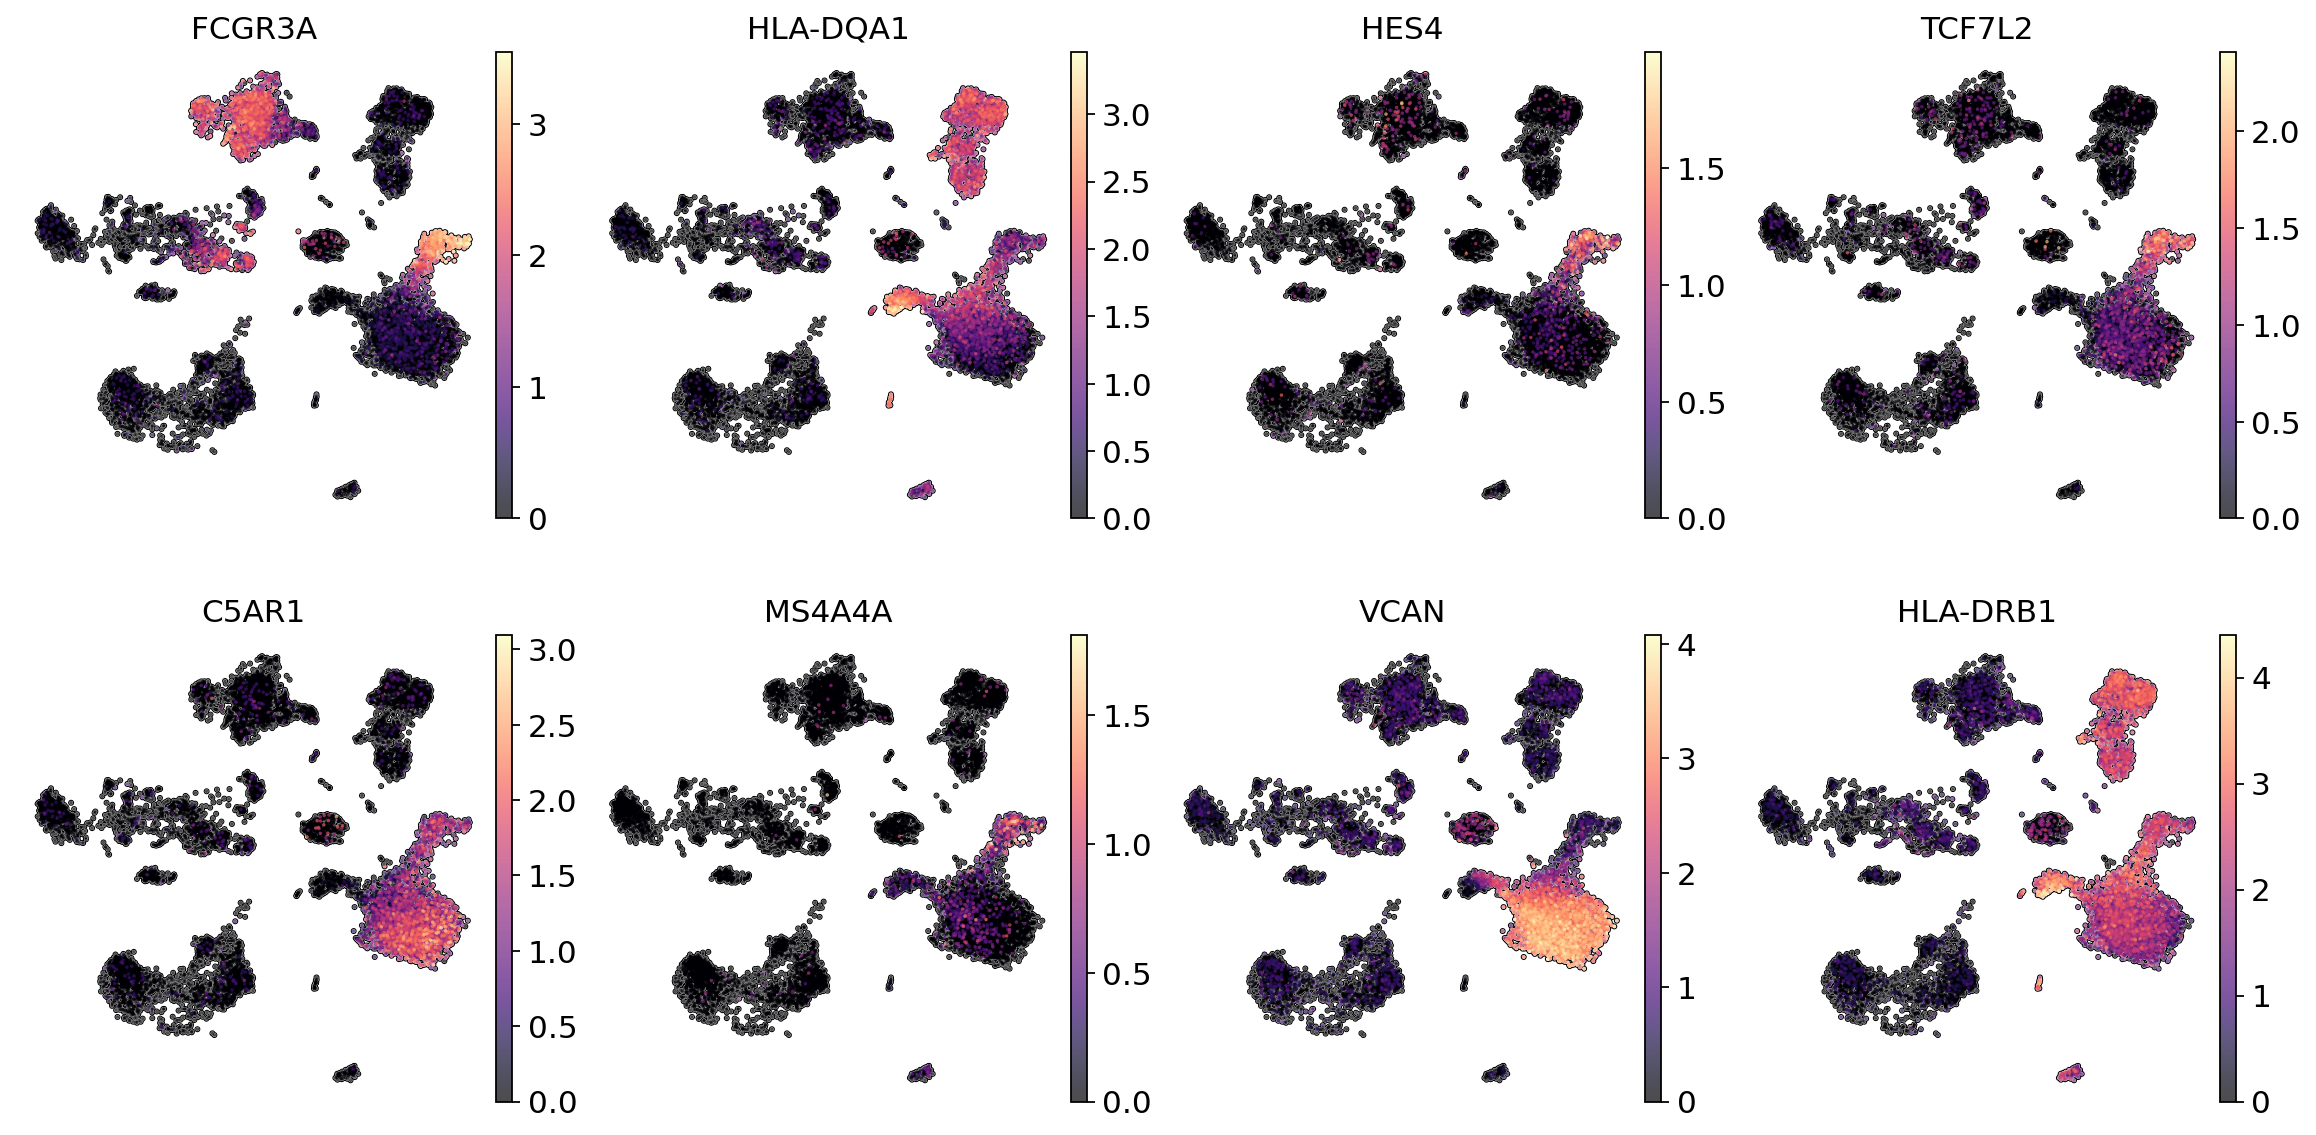

In [9]:
# Visualization of gene importances on cell embeddings
sc.set_figure_params(dpi_save = 600)
sc.pl.embedding(adata_rna,
                color = gene_importances_CD16_Mono.head(8)['gene_name'],
                basis = 'X_umap',
                frameon = False,
                add_outline = True,
                cmap = 'magma',
                size = 10,
                wspace = 0.1,
                ncols = 4,
                save = 'CD16_Mono_importance_8_top_genes.png')

Among the eight most important genes for identifying CD16+ monocytes, CD16 (FCGR3A) ranked first. Additionally, HES4, TCF7L2, HLA-DRB1, and HLA-DQA1 were also recognized as markers of these cells14. MS4A4A was highly expressed in CD16+ monocytes, making it a potential specific marker for this cell type. Conversely, VCAN could be considered a negative marker that distinguished CD14+ monocytes from CD16+ monocytes 

# scEve prediction

In [33]:
adata_pred_adt = scparadise.sceve.predict(adata_rna, 
                                          path_model = 'model_PBMC_scEve_tuned',
                                          return_mdata = False)

Successfully loaded list of genes used for training model

Successfully loaded list of features used for training model

Successfully loaded model



In [34]:
# Reggression report of predicted surface proteins
df = scparadise.scnoah.report_reg(adata_prot = adata_adt, 
                                  adata_pred_prot = adata_pred_adt,
                                  save_report = False,
                                  ndigits = 3,
                                  report_name = 'report_regression.csv',
                                  save_path = '')
df

EVS r2_score  RMSE  \
score                                            0.344    0.329  0.31   
EVS/r2_score          higher value - better prediction                  
RMSE/MedianAE/MeanAE   lower value - better prediction                  

                     MedianAE MeanAE  
score                   0.189  0.232  
EVS/r2_score                          
RMSE/MedianAE/MeanAE

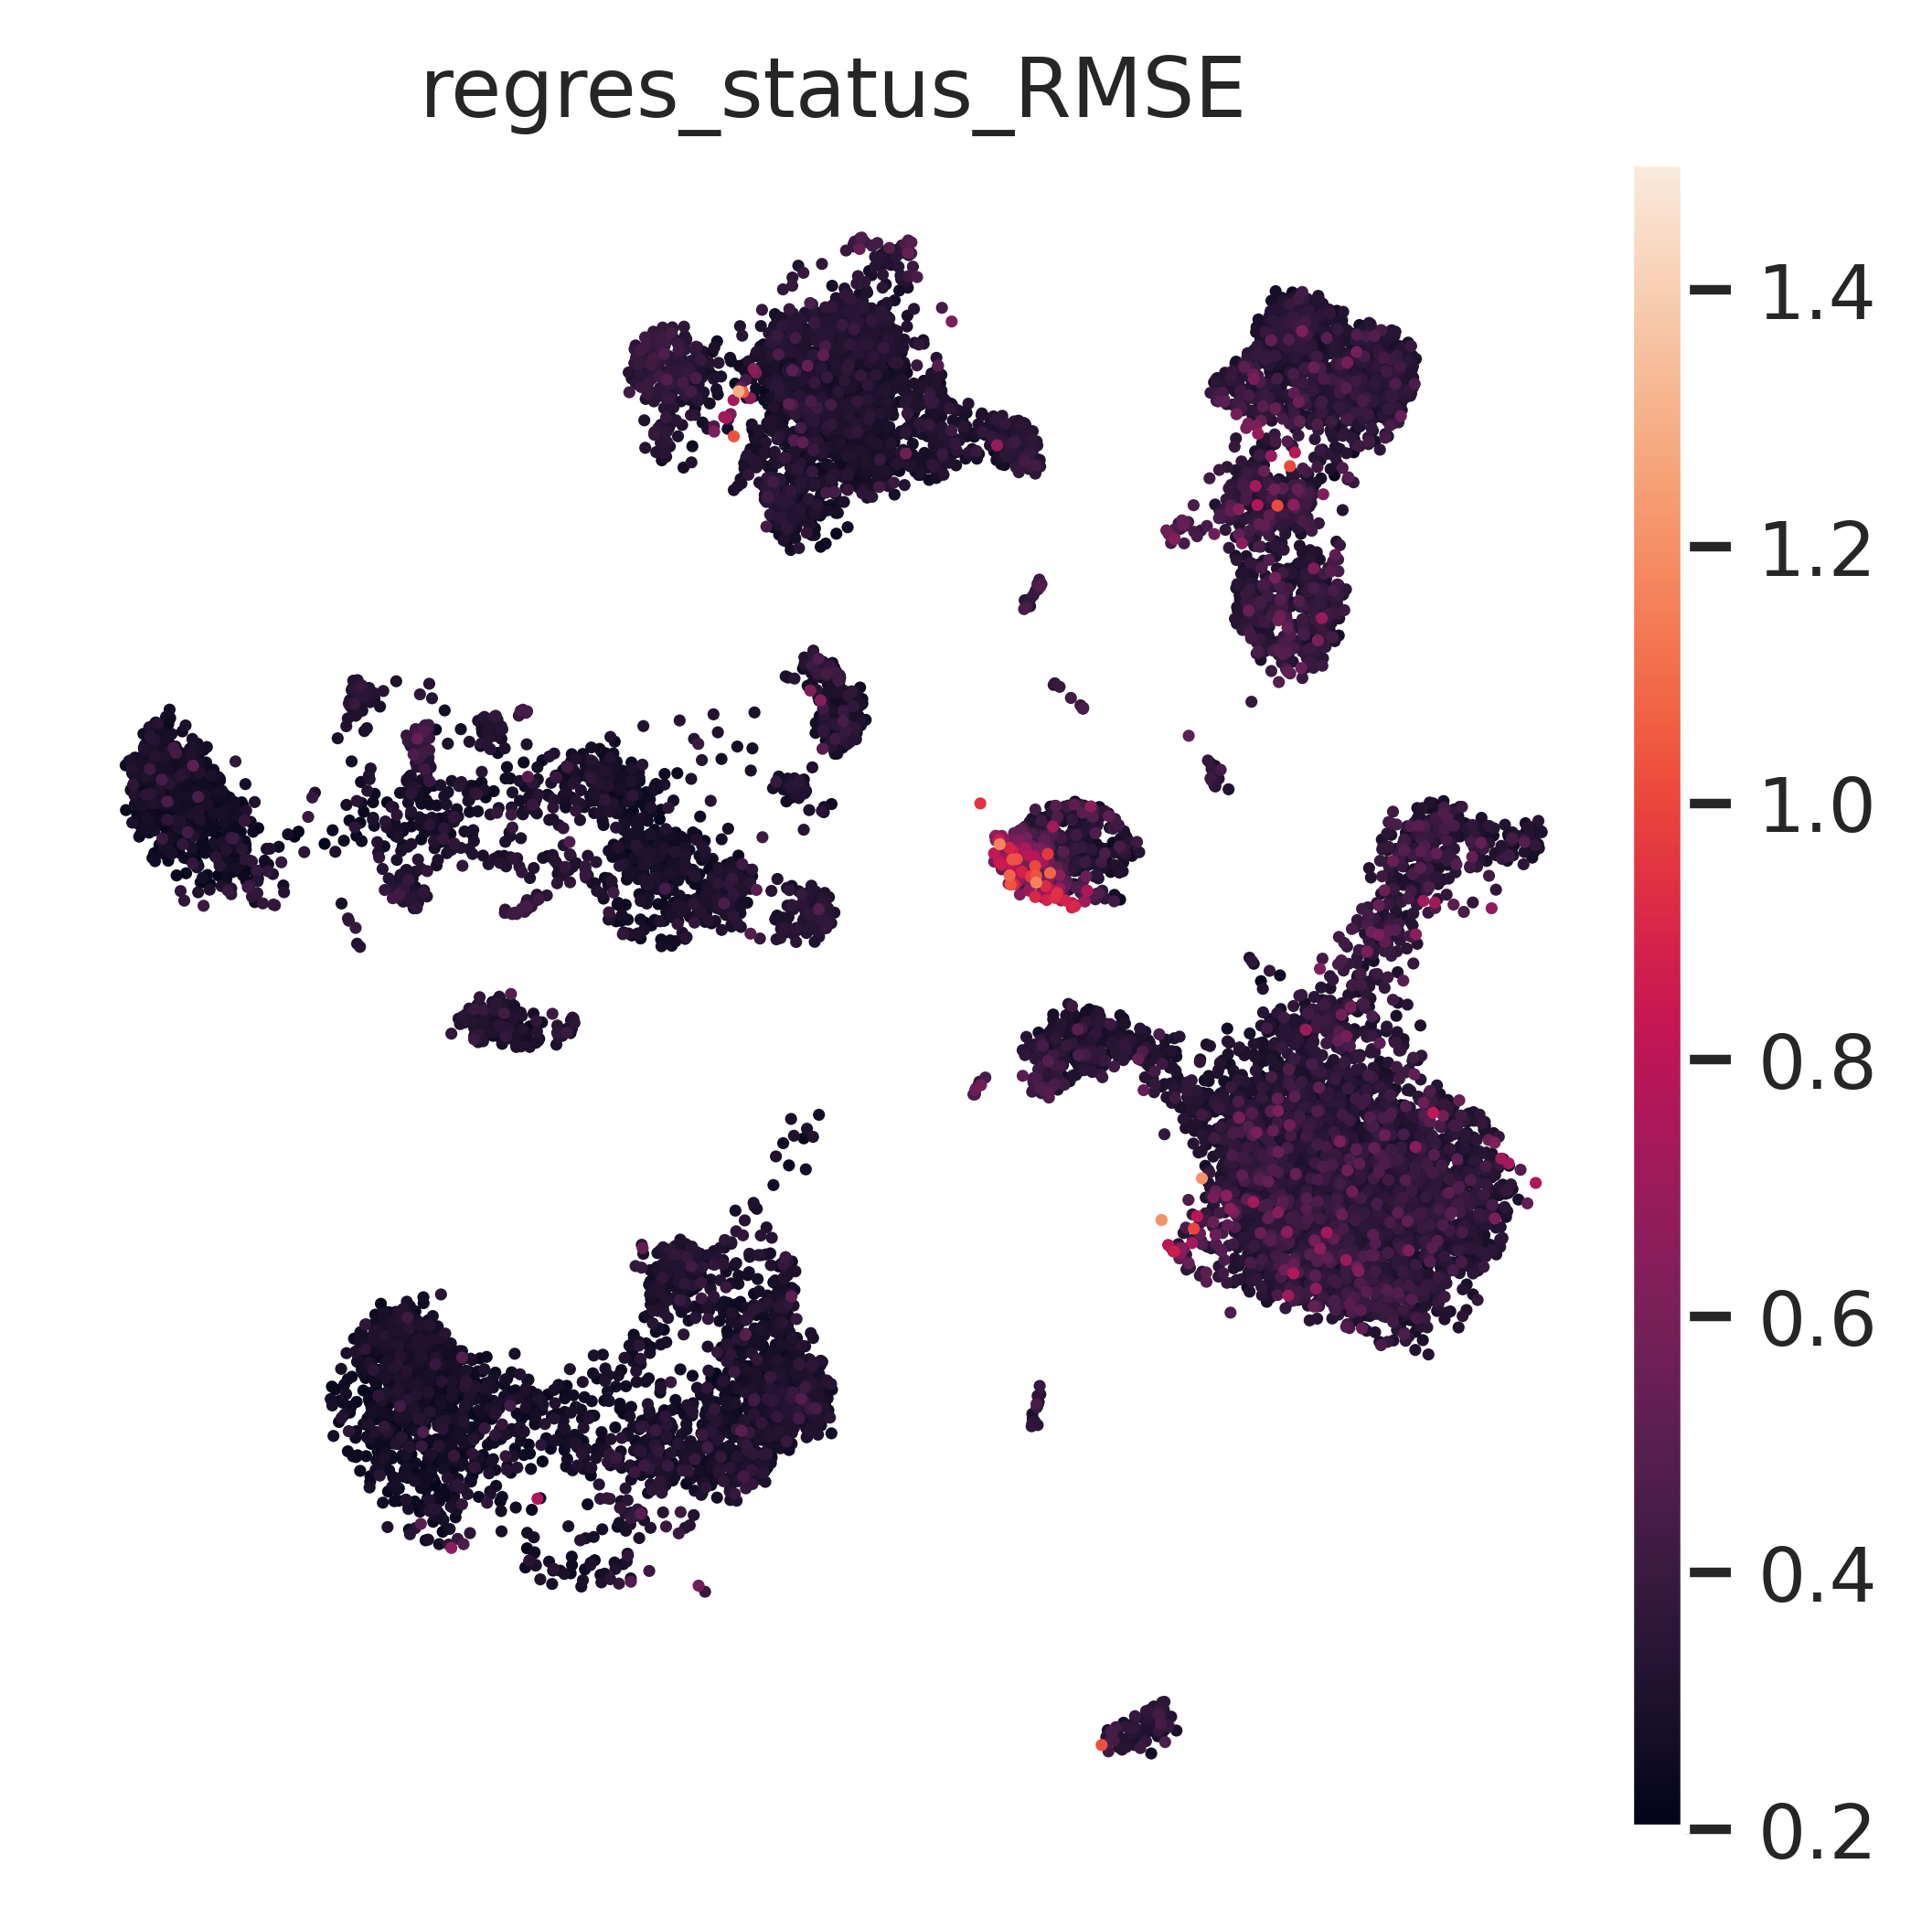

In [39]:
# Compute regression status
# Lower value - better result for error metrics (RMSE, MeanAE, MedianAE)
scparadise.scnoah.regres_status(adata_prot = adata_adt, 
                                adata_pred_prot = adata_pred_adt,
                                metric = 'RMSE')
adata_pred_adt.obsm = adata_adt.obsm.copy()
# Visualize prediction status of cells
sc.pl.embedding(adata_pred_adt, 
                color=['regres_status_RMSE',
                      ], 
                basis = 'X_umap_wnn', 
                frameon = False,
                legend_fontsize = 10, 
                legend_fontoutline = 2, 
                wspace = 0.2,
                size = 10,
                vmax = 1.5,
                vmin = 0.2,
                save = '_regres_status_RMSE.png'
               )

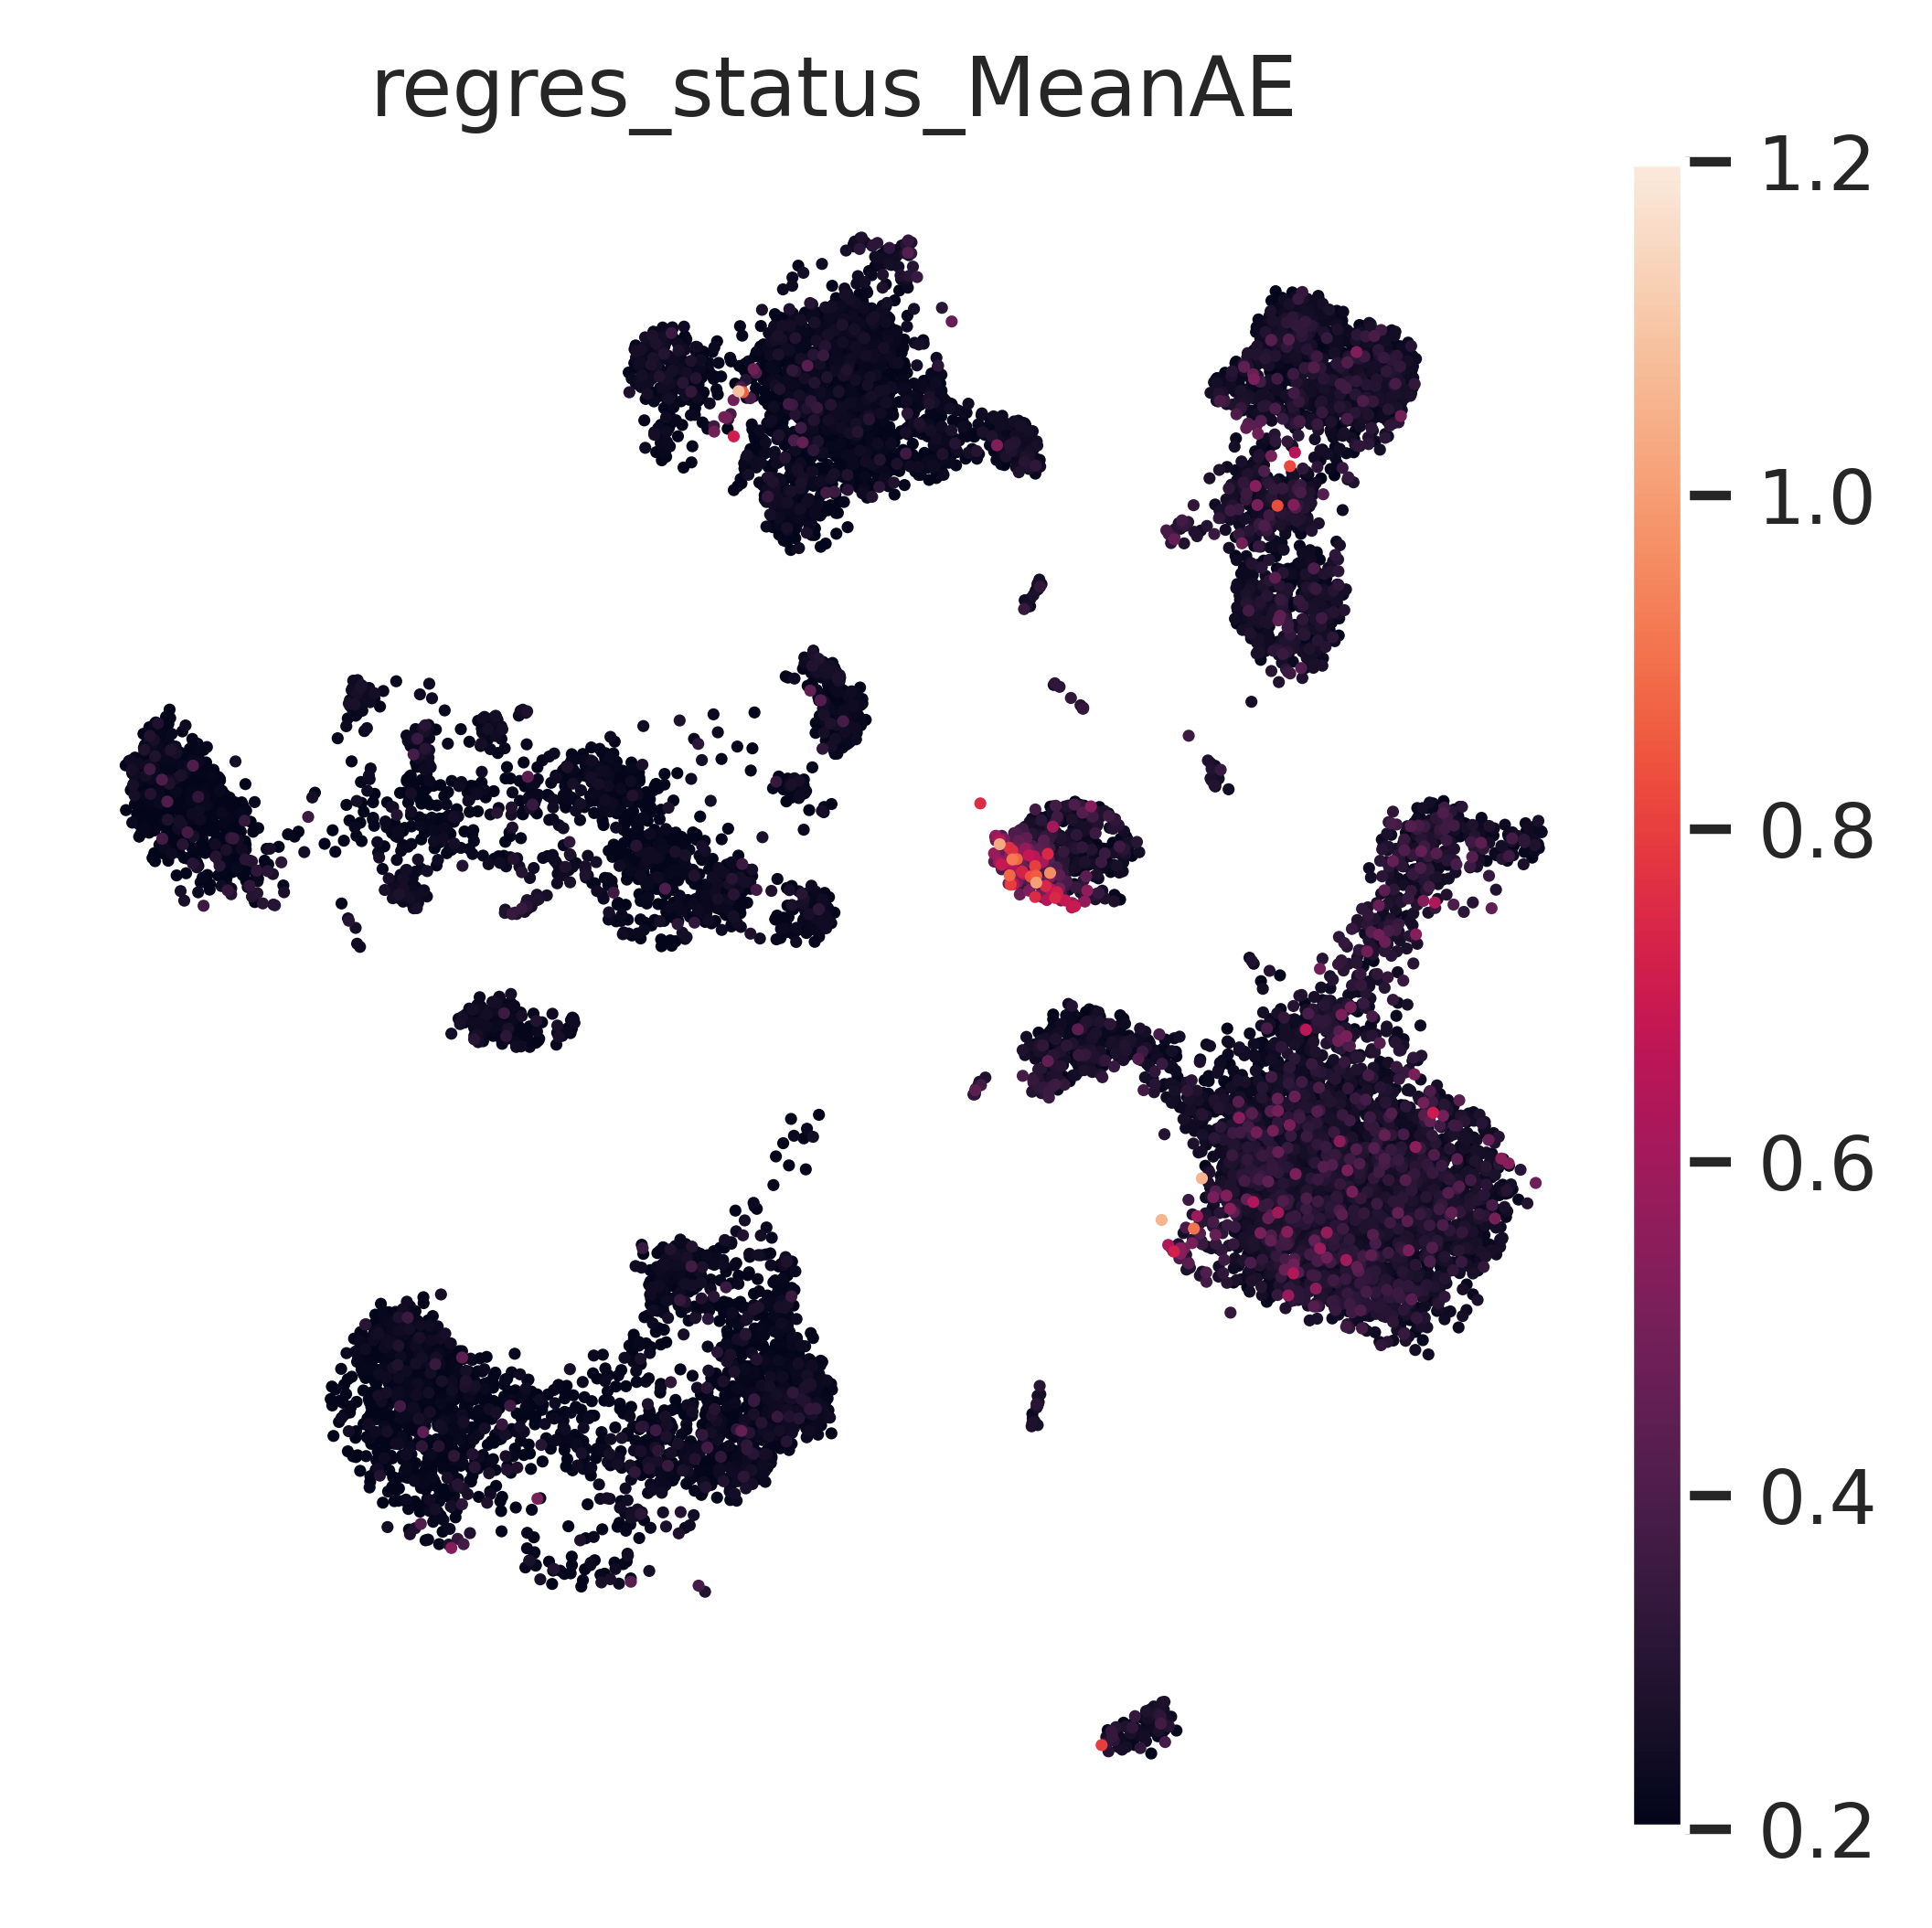

In [40]:
# Compute regression status
# Lower value - better result for error metrics (RMSE, MeanAE, MedianAE)
scparadise.scnoah.regres_status(adata_prot = adata_adt, 
                                adata_pred_prot = adata_pred_adt,
                                metric = 'MeanAE')
adata_pred_adt.obsm = adata_adt.obsm.copy()
# Visualize prediction status of cells
sc.pl.embedding(adata_pred_adt, 
                color=['regres_status_MeanAE',
                      ], 
                basis = 'X_umap_wnn', 
                frameon = False,
                legend_fontsize = 10, 
                legend_fontoutline = 2, 
                wspace = 0.2,
                size = 10,
                vmax = 1.2,
                vmin = 0.2,
                save = '_regres_status_MeanAE.png'
               )

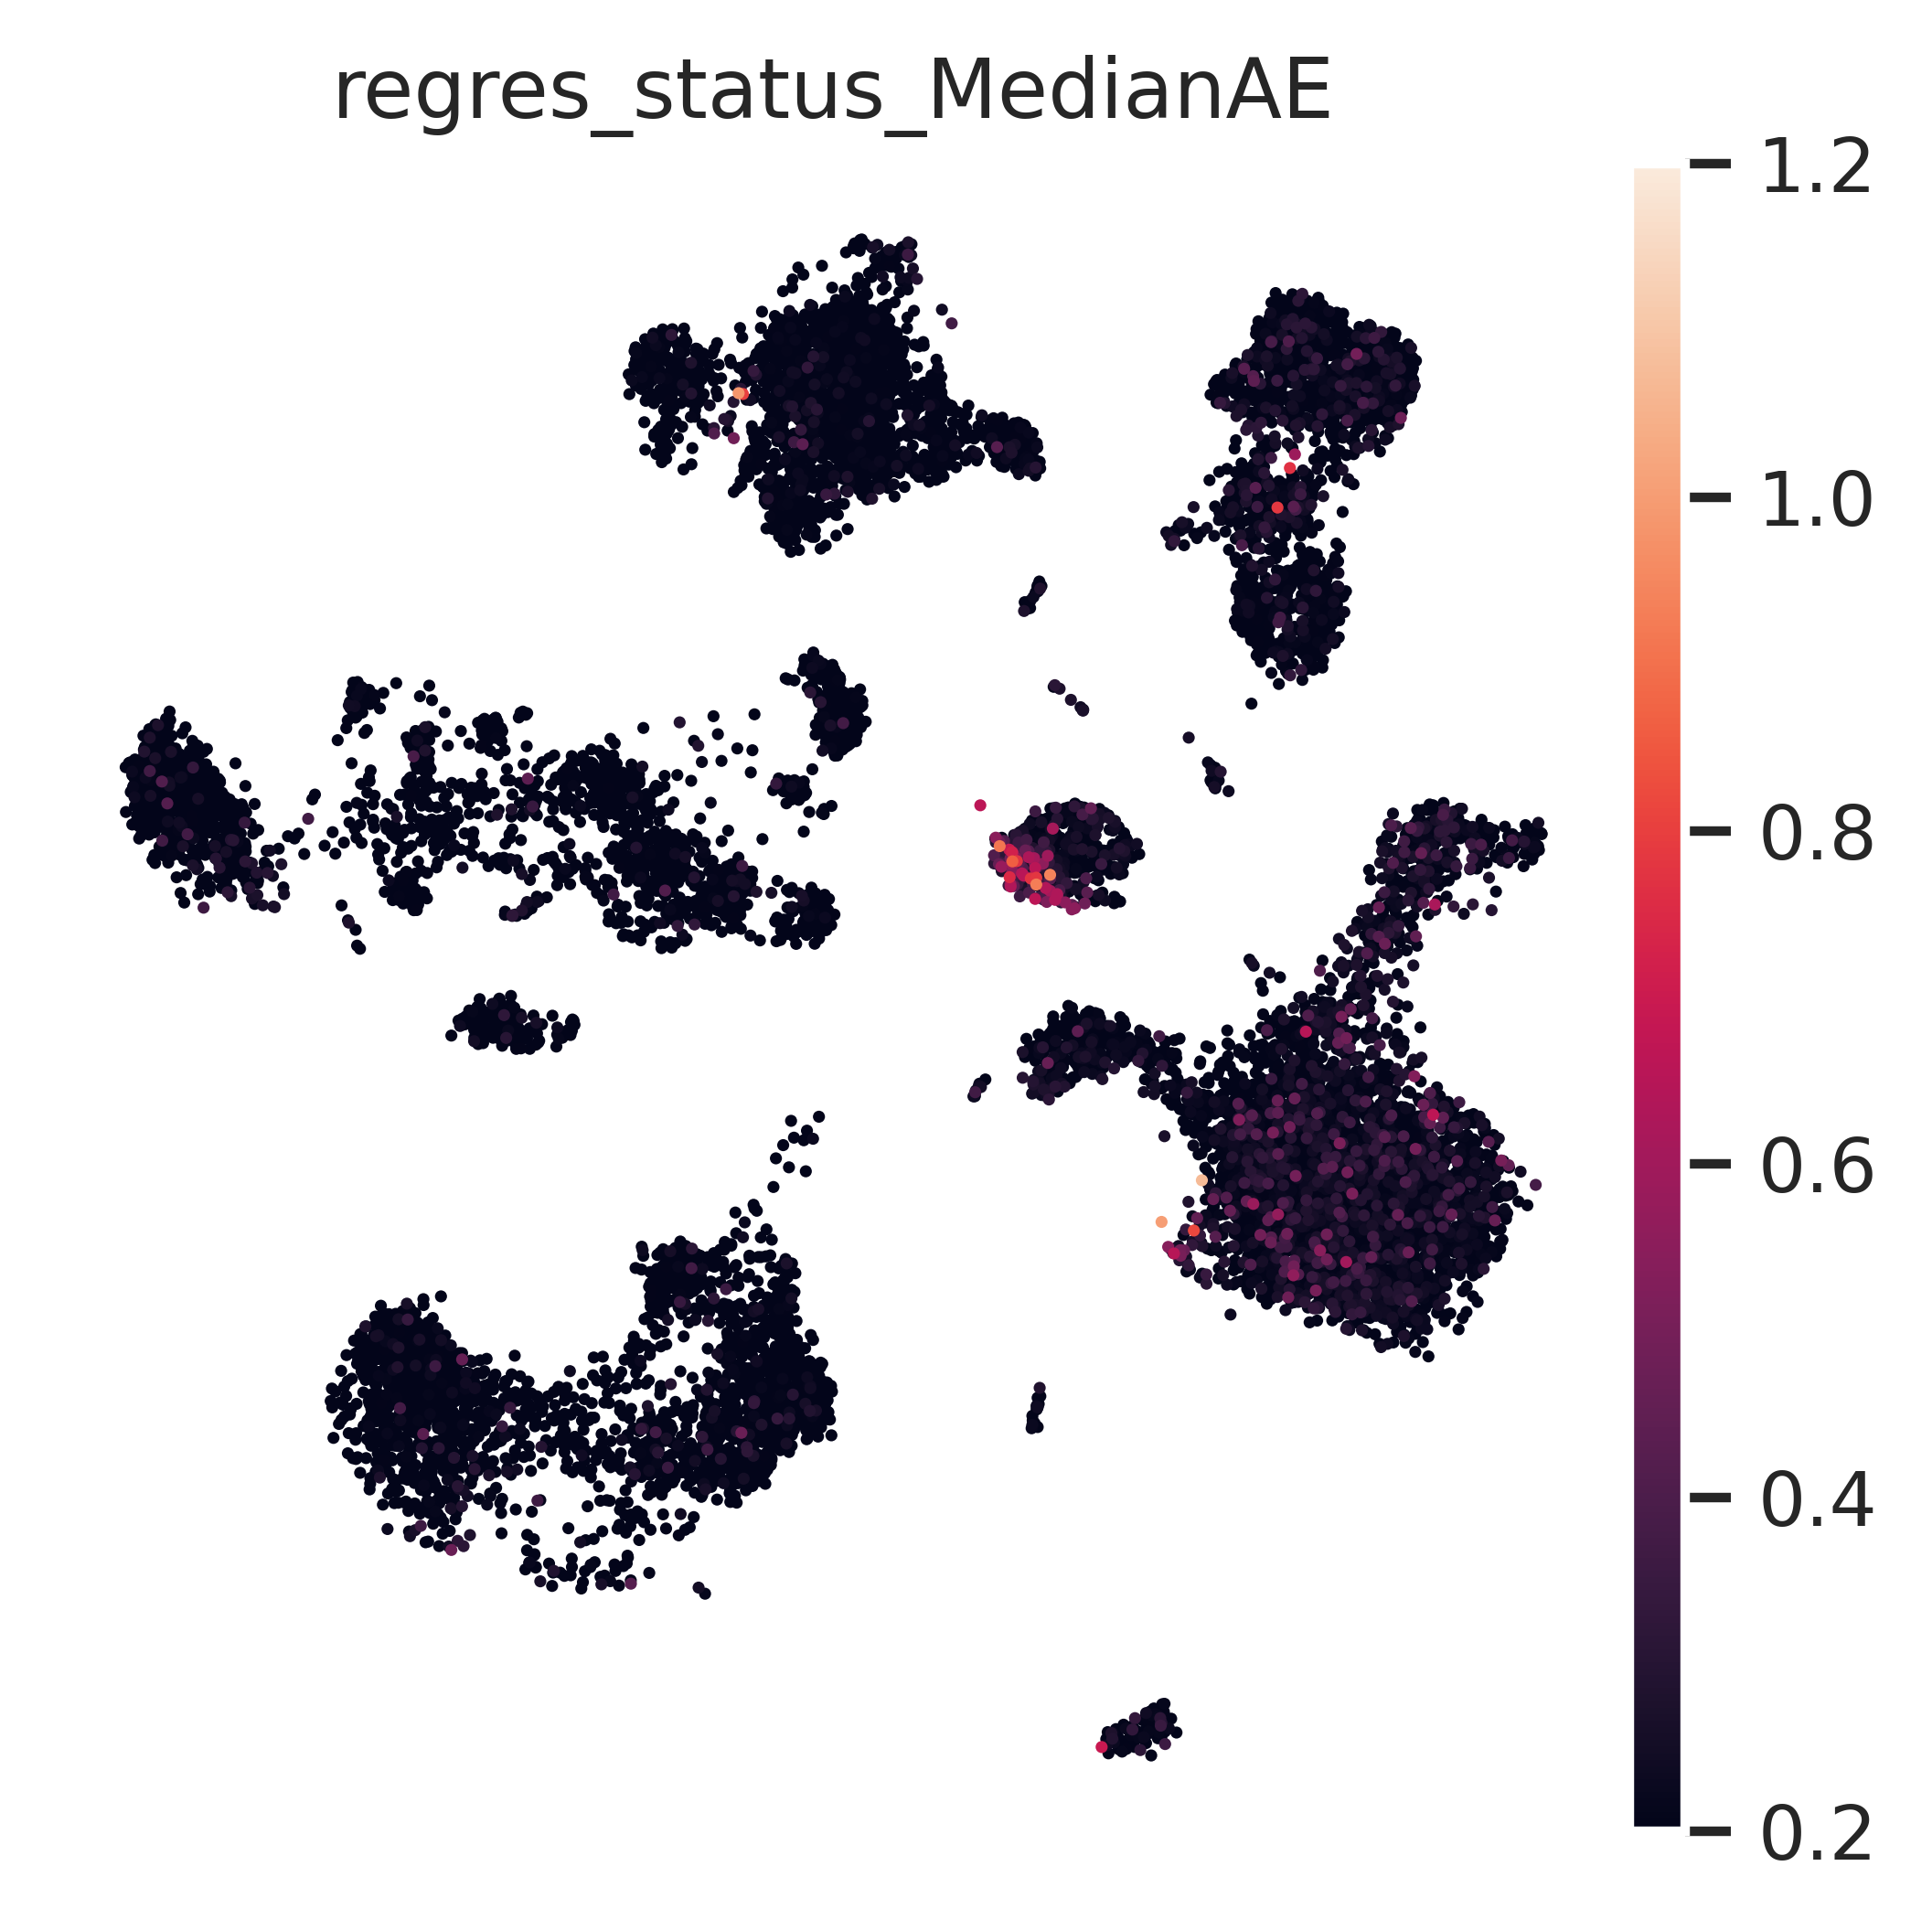

In [41]:
# Compute regression status
# Lower value - better result for error metrics (RMSE, MeanAE, MedianAE)
scparadise.scnoah.regres_status(adata_prot = adata_adt, 
                                adata_pred_prot = adata_pred_adt,
                                metric = 'MedianAE')
adata_pred_adt.obsm = adata_adt.obsm.copy()
# Visualize prediction status of cells
sc.pl.embedding(adata_pred_adt, 
                color=['regres_status_MedianAE',
                      ], 
                basis = 'X_umap_wnn', 
                frameon = False,
                legend_fontsize = 10, 
                legend_fontoutline = 2, 
                wspace = 0.2,
                size = 10,
                vmax = 1.2,
                vmin = 0.2,
                save = '_regres_status_MedianAE.png'
               )

In [18]:
pip list

Package                   Version
------------------------- --------------
absl-py                   2.1.0
adjustText                1.3.0
aiobotocore               2.5.4
aiohappyeyeballs          2.4.2
aiohttp                   3.10.8
aioitertools              0.12.0
aiosignal                 1.3.1
airr                      1.5.1
alembic                   1.13.3
anndata                   0.10.8
anyio                     4.6.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
array_api_compat          1.8
arrow                     1.3.0
asciitree                 0.3.3
asttokens                 2.4.1
async-lru                 2.0.4
async-timeout             4.0.3
attrs                     24.2.0
awkward                   2.7.1
awkward_cpp               42
babel                     2.16.0
bamnostic                 1.1.10
beautifulsoup4            4.12.3
bleach                    6.1.0
botocore                  1.31.17
cachetools                4.2.4
certifi               